# Polish companies bankruptcy data

## Opis danych

Zbiór danych dotyczy prognozowania upadłości polskich firm. Analizie poddano firmy w latach 2000-2012. Firmy zaznoczone, jako te które nie zbankrutowałem działay w latach 2007-2013.

Każdą firmę opisuje 64 kolumny, zawierające informacje zadłużeniu, obrotach, kapital itd.

Link do danych
http://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data

## Wczytanie danych

In [1]:
from scipy.io import arff
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def loadData():
    data = arff.loadarff('data/1year.arff')
    df_1_year = ps.DataFrame(data[0])
    data = arff.loadarff('data/2year.arff')
    df_2_year = ps.DataFrame(data[0])
    data = arff.loadarff('data/3year.arff')
    df_3_year = ps.DataFrame(data[0])
    data = arff.loadarff('data/4year.arff')
    df_4_year = ps.DataFrame(data[0])
    data = arff.loadarff('data/5year.arff')
    df_5_year = ps.DataFrame(data[0])
    return ps.concat([df_1_year, df_2_year, df_3_year, df_4_year, df_5_year], ignore_index=True)

data = loadData()
ps.set_option('display.max_columns', None)
data

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold,equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.63490,0.249760,0.149420,43.3700,1.24790,0.214020,0.119980,0.47706,0.504940,0.604110,1.45820,1.761500,5.9443,0.11788,0.149420,94.140,3.8772,0.56393,0.214020,1.74100,593.27000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.00050,0.258340,0.152000,87.9810,1.42930,0.248060,0.123040,NaN,0.395420,0.439920,88.44400,16.946000,3.6884,0.26969,0.152000,122.170,2.9876,2.98760,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.49988,0.33472,17.86600,17.86600,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.43690,0.309060,0.236100,73.1330,1.42830,0.302600,0.189960,NaN,0.289320,0.372820,86.01100,1.062700,4.3749,0.41929,0.238150,176.930,2.0630,1.42740,0.315650,1.30900,2.30190,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,

### Zbiór kolumn w zestawie danych

In [3]:
data.columns

Index(['net profit / total assets', 'total liabilities / total assets',
       'working capital / total assets',
       'current assets / short-term liabilities',
       '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
       'retained earnings / total assets', 'EBIT / total assets',
       'book value of equity / total liabilities', 'sales / total assets',
       'equity / total assets',
       '(gross profit + extraordinary items + financial expenses) / total assets',
       'gross profit / short-term liabilities',
       '(gross profit + depreciation) / sales',
       '(gross profit + interest) / total assets',
       '(total liabilities * 365) / (gross profit + depreciation)',
       '(gross profit + depreciation) / total liabilities',
       'total assets / total liabilities', 'gross profit / total assets',
       'gross profit / sales', '(inventory * 365) / sales',
       'sales (n) / sales (n-1)',
       'prof

### Podsumowanie surowych danych

In [4]:
data.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold,equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,43361.000000,43271.000000,43278.000000,43397.000000,4.336900e+04,43310.000000,43311.000000,43397.000000,43277.000000,4.327800e+04,37551.000000,43397.000000,43278.000000,42483.000000,43397.000000,43310.000000,4.064100e+04,42593.000000,43397.000000,43278.000000,43278.000000,4.303700e+04,43271.000000,43311.000000,43397.000000,43397.000000,24421.000000,43397.000000,43278.000000,43271.000000,42651.000000,43278.000000,4.327800e+04,4.327800e+04,41258.000000,43270.000000,4.310800e+04,43396.000000,43278.000000,43311.000000,43397.000000,43104.000000,42593.000000,42593.000000,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,0.131075,1.132430,0.809544,0.093489,1.991890e+03,1.411167,13.802535,0.098565,0.156277,2.430209e+02,3.884997,0.113923,0.138582,0.270012,0.392844,1.263864,1.107896e+03,6.003208,4.005020,7.370821,0.176847,1.162621e+03,8.636016,5.411439,0.111908,2.911241,105.085363,0.724357,-0.289102,2.147411,7.717806,-0.142514,1.074125e+03,8.311085e+02,14.825016,5.428857,3.578418e+02,0.028584,-0.482584,5.835373,0.483521,6.478459,23.772623,24.654700,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074

### Typy danych

W naszym zbiorze wszystkie wartości są wartościami liczbowymi, oprócz kolumny *bankruptcy*, która jest obiektem. Przekonwetujemy kolumne banckruptcy na kolumne liczbową.

In [5]:
data.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

#### Konwersja *bankruptcy*

In [6]:
data['bankruptcy'] = data['bankruptcy'].replace(b'0', 0)
data['bankruptcy'] = data['bankruptcy'].replace(b'0', 1)
data['bankruptcy'] = data['bankruptcy'].astype(int)

In [7]:
data['bankruptcy'].unique()

array([0, 1])

## Analiza danych

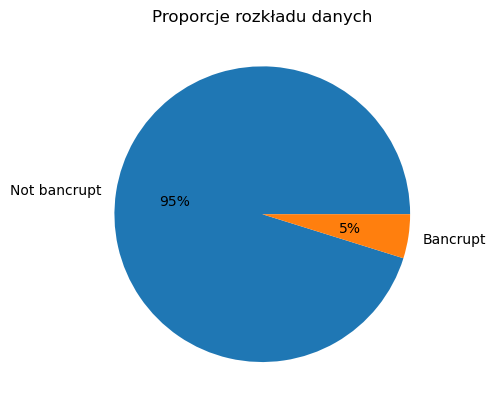

<Figure size 1500x1000 with 0 Axes>

In [8]:
counts = data.groupby(['bankruptcy'])['net profit / total assets'].count()
plt.title("Proporcje rozkładu danych")
plt.pie(counts, labels = ["Not bancrupt", "Bancrupt"], autopct='%.0f%%')
plt.figure(figsize=(15, 10))
plt.show() 

Dane są mocno niezbilansowane. Podczas trenowanie zrównoważymy ilość danych nadając odpowiednie wagi. Aby ocenić wydajności modelu użyjemu miary **F1 Score** lub **AUC Score**

## Missing Values

Nasze danych posiadają sporo missing values. Prawie połowa wierszy posiada przynajmniej jedno missing value

In [9]:
data.isna().any(axis=1).value_counts()

True     23438
False    19967
dtype: int64

Każda kolumna oprócz bankruptcy posiada przynajmniej jedno missing value                                                   

In [10]:
null_sum = data.isna().sum().sort_values()
null_sum

bankruptcy                                                                                           0
working capital                                                                                      1
long-term liabilities / equity                                                                       7
(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)        7
short-term liabilities / total assets                                                                8
                                                                                                 ...  
net profit / inventory                                                                            2147
sales / inventory                                                                                 2152
profit on operating activities / financial expenses                                               2764
sales (n) / sales (n-1)                                                  

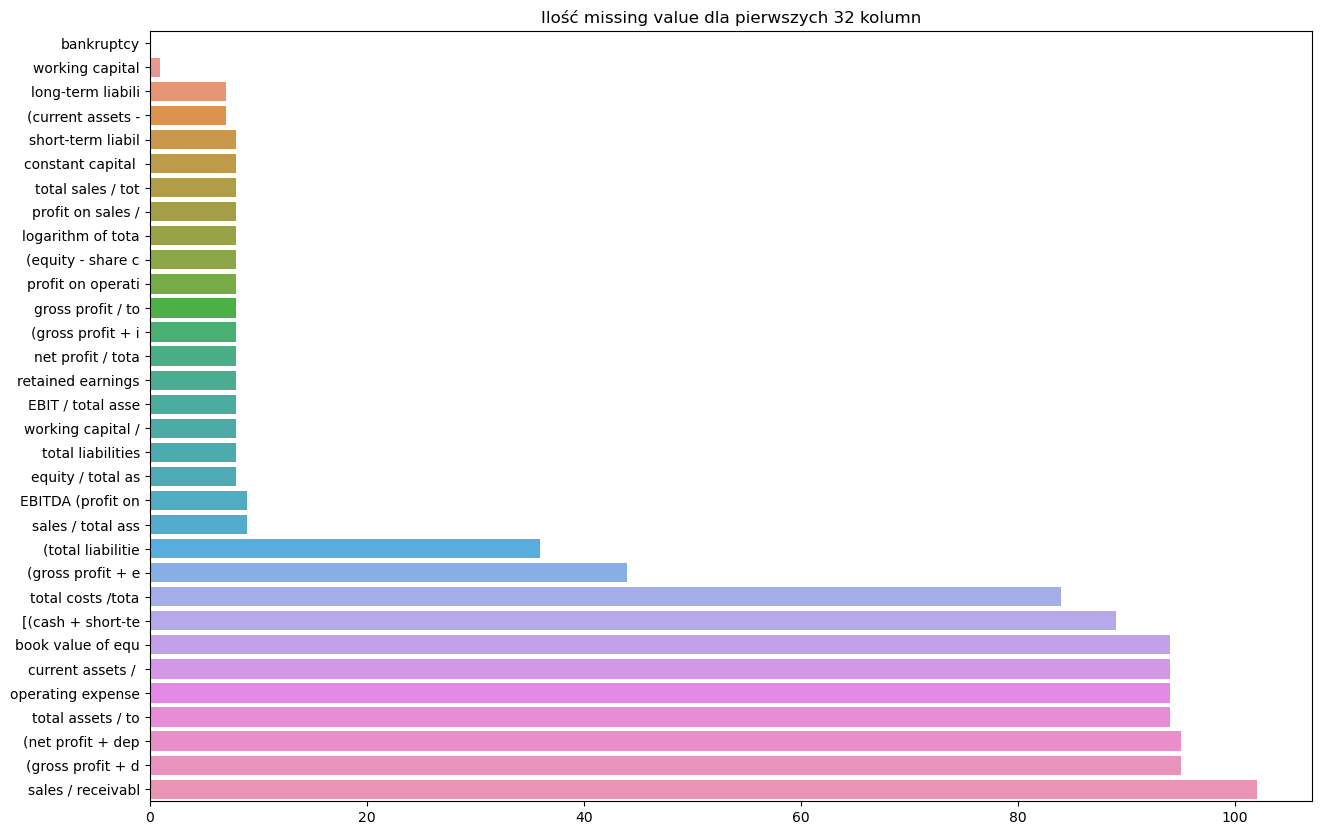

In [11]:
plt.figure(figsize=(15, 10))
sns.barplot(y = null_sum[0:32].index.map(lambda x : x[0:17]), x=null_sum[0:32].values)
plt.title("Ilość missing value dla pierwszych 32 kolumn")
plt.show()

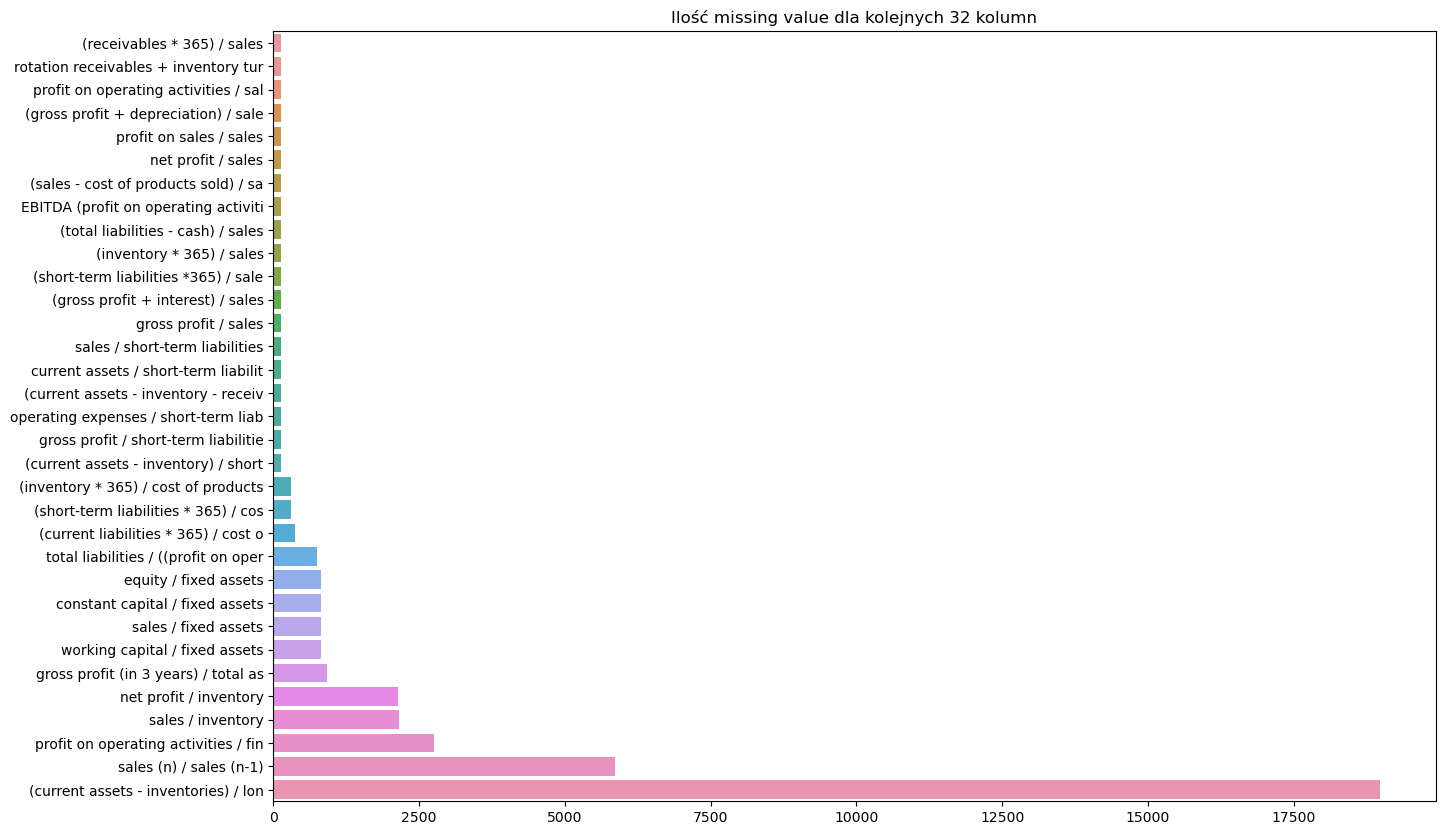

In [12]:
plt.figure(figsize=(15, 10))
sns.barplot(y = null_sum[32:66].index.map(lambda x : x[0:36]), x=null_sum[32:66].values)
plt.title("Ilość missing value dla kolejnych 32 kolumn")
plt.show()

### Analiza najczęściej występujących misssing value

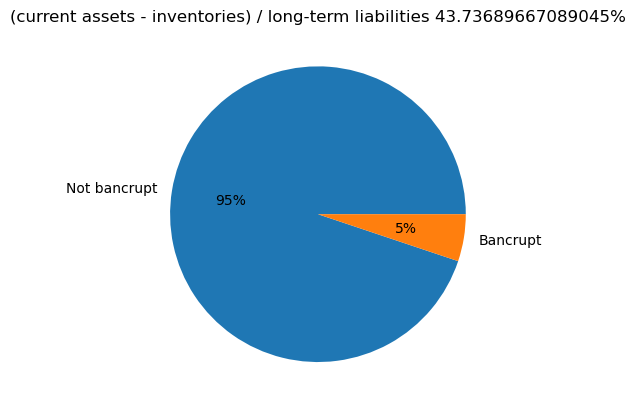

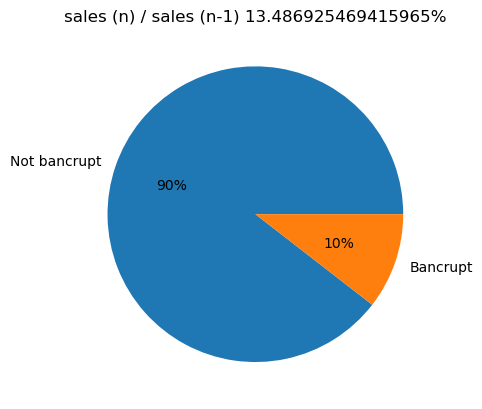

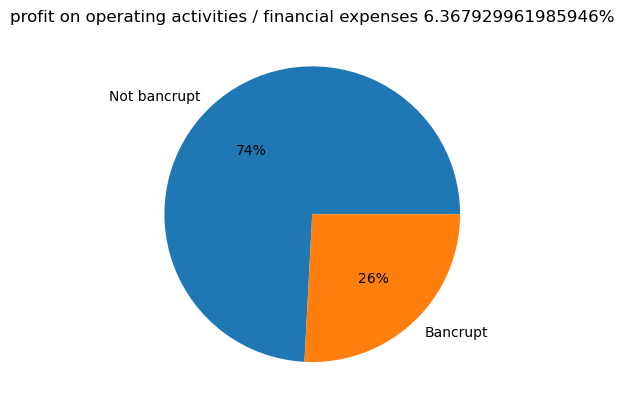

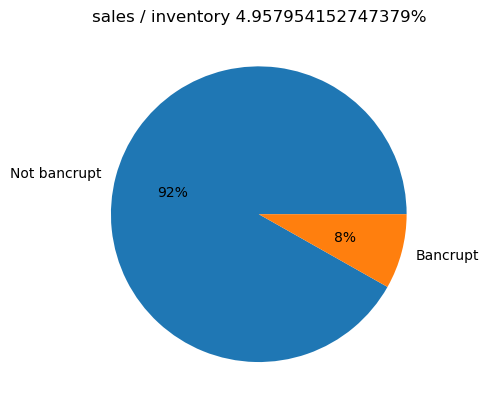

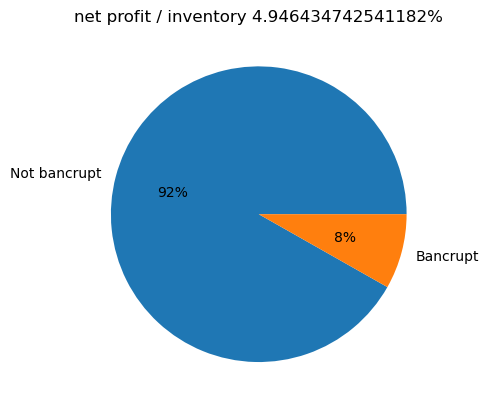

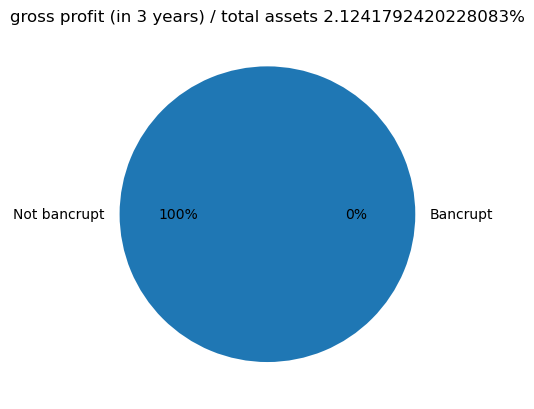

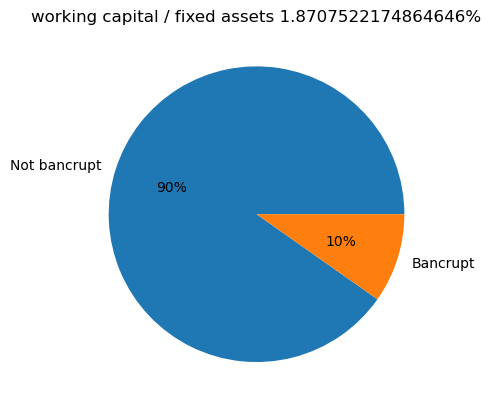

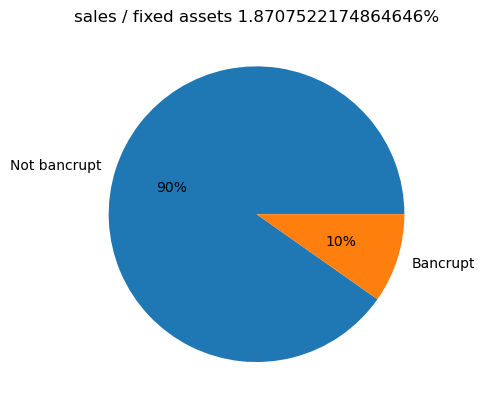

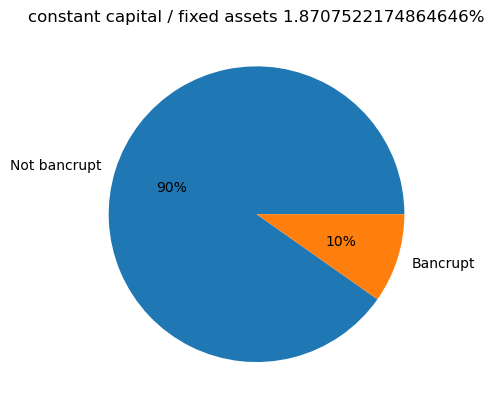

In [13]:
for i in range(64, 55, -1):
    counts = data[data[null_sum.index[i]].isna()].groupby(['bankruptcy'])['net profit / total assets'].count()
    plt.pie(counts, labels = ["Not bancrupt", "Bancrupt"], autopct='%.0f%%')
    procent = null_sum[i] * 100 / len(data.index)
    plt.title("{} {}%".format(null_sum.index[i], procent))
    plt.show() 

Kolumna *(current assets - inventories) / long-term liabilities* jest pusta dla 43% przypadków. Dlatego usuniemy ją z naszego zestawu danych

Możemy zauważyć, że dla kolumny *sales (n) / sales (n-1)* oraz *profit on operating activities / financial expenses* rozkład bankruptcy jest znacząco inny. Dla tego dodamy kolumny binarne do zbioru danych, które będą przechowywały informacje czy w danej kolumnie było missing value. W innych kolumnach, albo było za mało missing values aby wyciągać z tego można było jakieś wnioski lub ich rozkład był zbyt podobny do całego zbioru danych

In [14]:
data['miss sales (n) / sales (n-1)'] = ps.isna(data['sales (n) / sales (n-1)']).astype(int)
data['miss profit on operating activities / financial expenses'] = ps.isna(data['profit on operating activities / financial expenses']).astype(int)
data

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold,equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy,miss sales (n) / sales (n-1),miss profit on operating activities / financial expenses
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.63490,0.249760,0.149420,43.3700,1.24790,0.214020,0.119980,0.47706,0.504940,0.604110,1.45820,1.761500,5.9443,0.11788,0.149420,94.140,3.8772,0.56393,0.214020,1.74100,593.27000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0,0,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.00050,0.258340,0.152000,87.9810,1.42930,0.248060,0.123040,NaN,0.395420,0.439920,88.44400,16.946000,3.6884,0.26969,0.152000,122.170,2.9876,2.98760,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.49988,0.33472,17.86600,17.86600,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0,0,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.43690,0.309060,0.236100,73.1330,1.42830,0.302600,0.189960,NaN,0.289320,0.372820,86.01100,1.062700,4.3749,0.41929,0.238150,176.930,2.0630,1.42740,0.315650,1.30

### Ilość missing value dla każdej firmy

Ilość missing value dla każdej firmy wpływa na ich ryzyko zbankrutowania

In [15]:
null_row = data.isna().sum(axis=1)
null_row

0        0
1        2
2        1
3        1
4        1
        ..
43400    0
43401    1
43402    1
43403    1
43404    1
Length: 43405, dtype: int64

Ilość wierszy zawierająca daną ilość missing value

In [16]:
null_row.groupby(null_row).count()

0     19967
1     16060
2      4134
3      1431
4       588
5       404
6       238
7       183
8       111
9        46
10       17
11        6
12        7
13        8
14       35
15       28
16       19
17       27
18       17
19       10
20        9
21        7
22       20
23       10
24        2
25        3
28        2
30        2
32        2
33        3
34        1
35        5
36        1
40        1
41        1
dtype: int64

In [17]:
data['groupCount'] = null_row.map(lambda x: min(x, 2))
mean_null = data.groupby(['groupCount'])['bankruptcy'].mean()
count_null = data.groupby(['groupCount'])['bankruptcy'].count()
mean_null.name = "Bankruptcy rate"
count_null.name = "Count"

ps.concat([mean_null,count_null],axis=1)

,Bankruptcy rate,Count
groupCount,,
0,0.021636,19967
1,0.057161,16060
2,0.100434,7378


Z analizy wynika, że ryzyko zbankrtowania:
firm bez żadnych missing value wynosi **2%**, 
firm z jednym missing value wynosi **5%**,
firm z więcej niż jeden missing value wynosi **10%**

Dodajemy tą informacje do naszego datasetu, jako **groupCount**

## Korelacja

Test korelacji dla metody spearmana

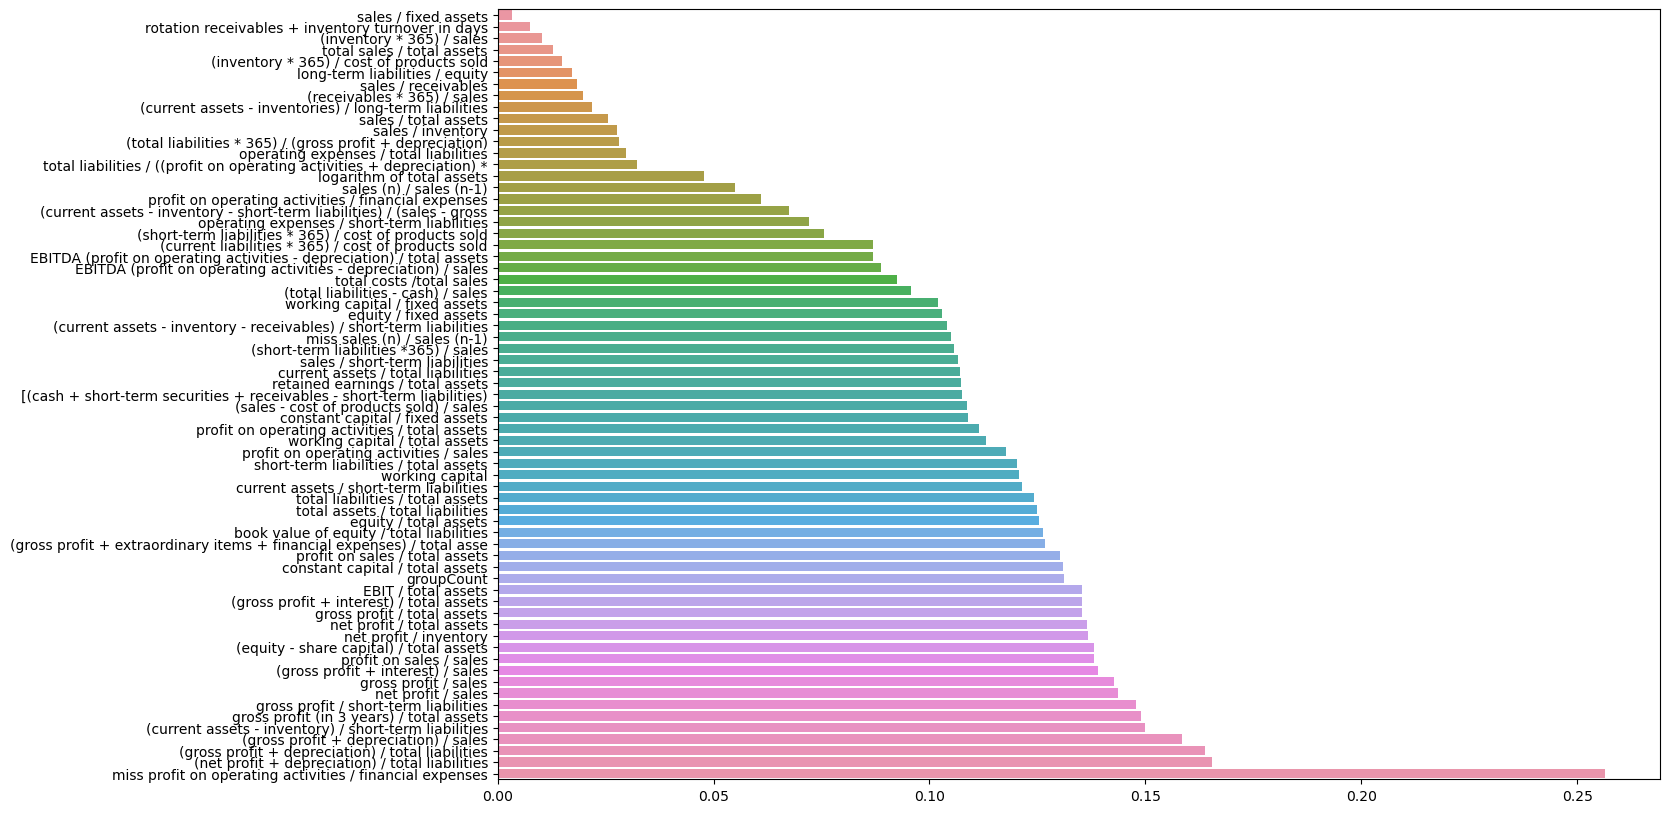

In [18]:
corr = data.corr(method="spearman")['bankruptcy'].map(lambda x: abs(x)).sort_values()
corr = corr.drop('bankruptcy')
plt.figure(figsize=(15, 10))
sns.barplot(y = corr.index.map(lambda x : x[0:70]), x=corr.values)
plt.show()

In [19]:
corr

sales / fixed assets                                        0.003379
rotation receivables + inventory turnover in days           0.007563
(inventory * 365) / sales                                   0.010297
total sales / total assets                                  0.012825
(inventory * 365) / cost of products sold                   0.014963
                                                              ...   
(current assets - inventory) / short-term liabilities       0.149986
(gross profit + depreciation) / sales                       0.158584
(gross profit + depreciation) / total liabilities           0.163911
(net profit + depreciation) / total liabilities             0.165327
miss profit on operating activities / financial expenses    0.256372
Name: bankruptcy, Length: 67, dtype: float64

Nasze dane są w marginalnyh sposób skorelowane z labelami. Porównajmy jeszcze rozkłady najlepiej skorelowanych kolumn

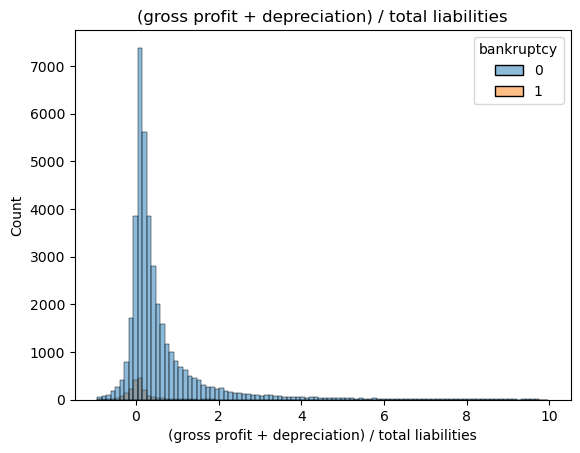

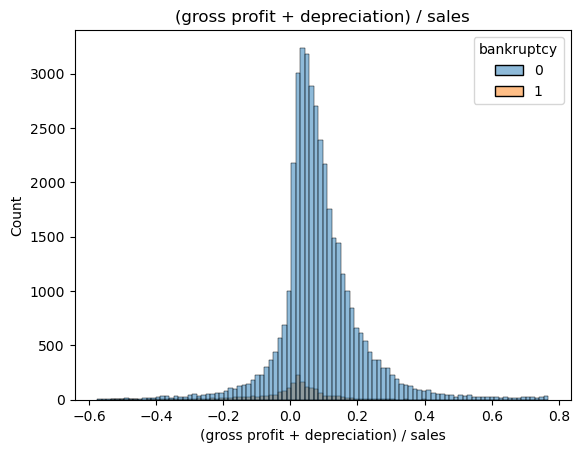

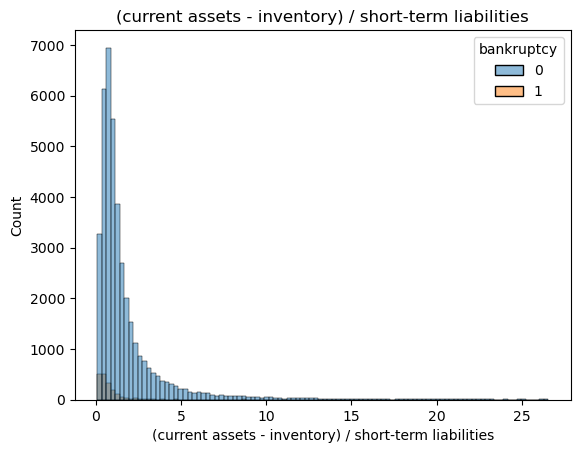

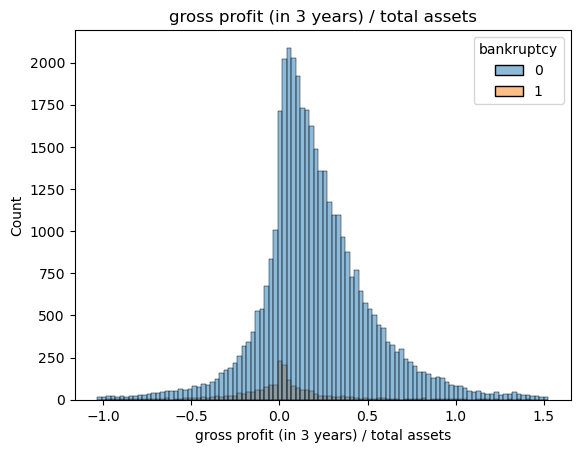

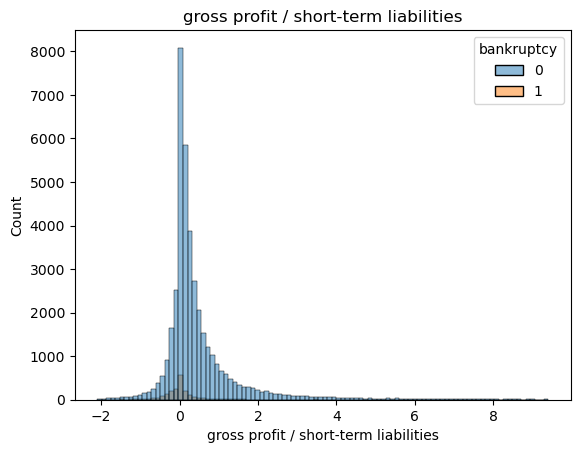

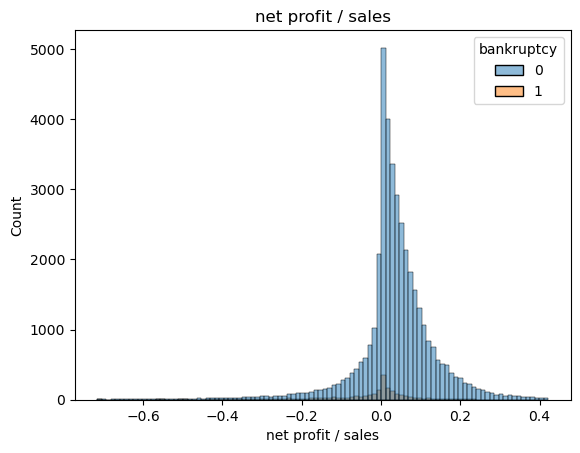

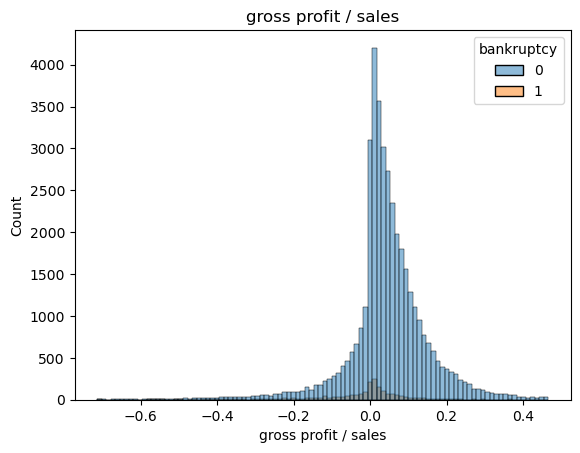

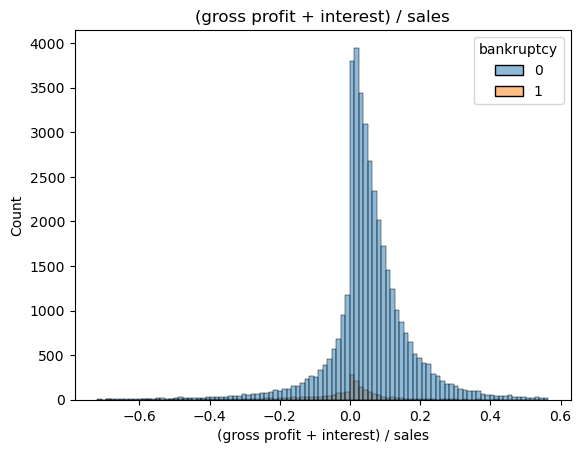

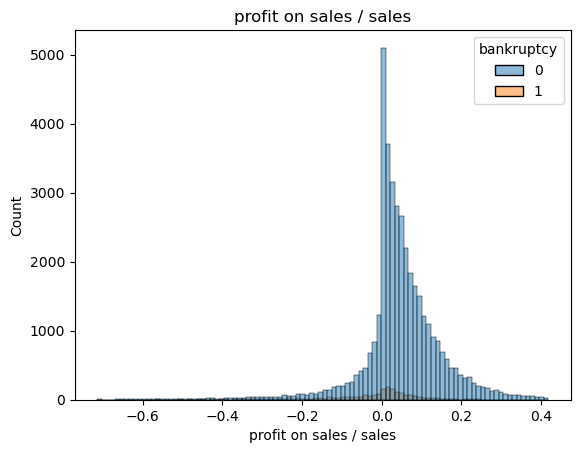

In [20]:
for i in range(64, 55, -1):
    q = data[corr.index[i]].quantile([0.01, 0.99])
    sns.histplot( data=data, x=corr.index[i], bins=100, hue="bankruptcy", binrange=(q.iloc[0], q.iloc[1]))
    plt.title(corr.index[i])
    plt.show() 

Rozkład dla firm które zbankrutowały jest mniej więcej podobny jak dla firm które tego nie zrobiły. Korelacja spermana nie przeoczyła żadnej oczywistej zależności

# Przygotawanie danych

Podział danych na train i test

In [21]:
from sklearn.model_selection import train_test_split

y = data['bankruptcy']
X = data.drop(['bankruptcy', '(current assets - inventories) / long-term liabilities'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold,equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,miss sales (n) / sales (n-1),miss profit on operating activities / financial expenses,groupCount
9470,-0.055639,0.116810,0.861570,8.37570,1872.8000,-1.684900,-0.055639,7.56070,0.059383,0.88319,-0.055639,-0.476310,-0.927000,-0.055639,-774.53,-0.471250,8.56070,-0.055639,-0.936950,0.000,NaN,-0.088513,-0.936950,-0.055639,-0.993310,-0.471250,NaN,39.854000,2.5274,-11.703000,-0.936950,256.520,1.4229,1.422900,-0.106830,0.059383,0.883190,-1.799000,6.949500,-0.044286,-1.490600,1024.000,1024.000,NaN,8.37570,0.000,-0.089104,-1.500500,8.37570,0.116810,0.702800,40.85400,40.85400,290.170,-1.799000,-0.062998,1.50110,0.000000,NaN,0.35645,717.990,0.50836,2.74690,1,1,2
33414,-0.113970,1.186600,-0.680020,0.27191,-119.7100,-0.228180,-0.108940,-0.15729,2.417100,-0.18664,-0.079894,-0.116640,-0.002706,-0.108940,-66225.00,-0.005511,0.84271,-0.108940,-0.045072,18.147,0.96570,-0.083773,-0.047154,-0.468310,-0.342160,-0.009753,-2.884000,-0.911500,3.8082,0.490840,-0.034186,135.590,2.6919,2.118800,-0.097132,2.417100,-0.041913,-0.040186,0.002204,2.123400,-0.034659,38.038,19.892,-0.948440,0.14324,17.446,-0.186170,-0.077025,0.21401,0.933970,0.371480,-0.25017,-0.05618,-4372.700,-0.040186,0.610660,1.04430,-0.775440,20.1140,18.34900,141.040,2.58800,3.23980,0,0,0
43105,0.184590,0.563480,0.032701,1.08870,-23.6230,0.184590,0.230190,0.69609,1.087200,0.39223,0.230190,0.624230,0.126840,0.230190,652.92,0.559030,1.77470,0.230190,0.092689,25.702,1.37270,0.213450,0.074327,0.230190,0.392230,0.478100,NaN,0.054634,4.4081,0.211940,0.092689,58.921,6.1948,0.

Utworzenie kflodów

In [22]:
from sklearn.model_selection import StratifiedKFold
seed = 1
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

### Analiza PCA

Podczas trenowanie będziemy chcieli zmniejszyć ilość wymiarów. Użyjemy do tego **PCA** i **FeatureSelectora**
Poniżej krótka anliza wymiarowości

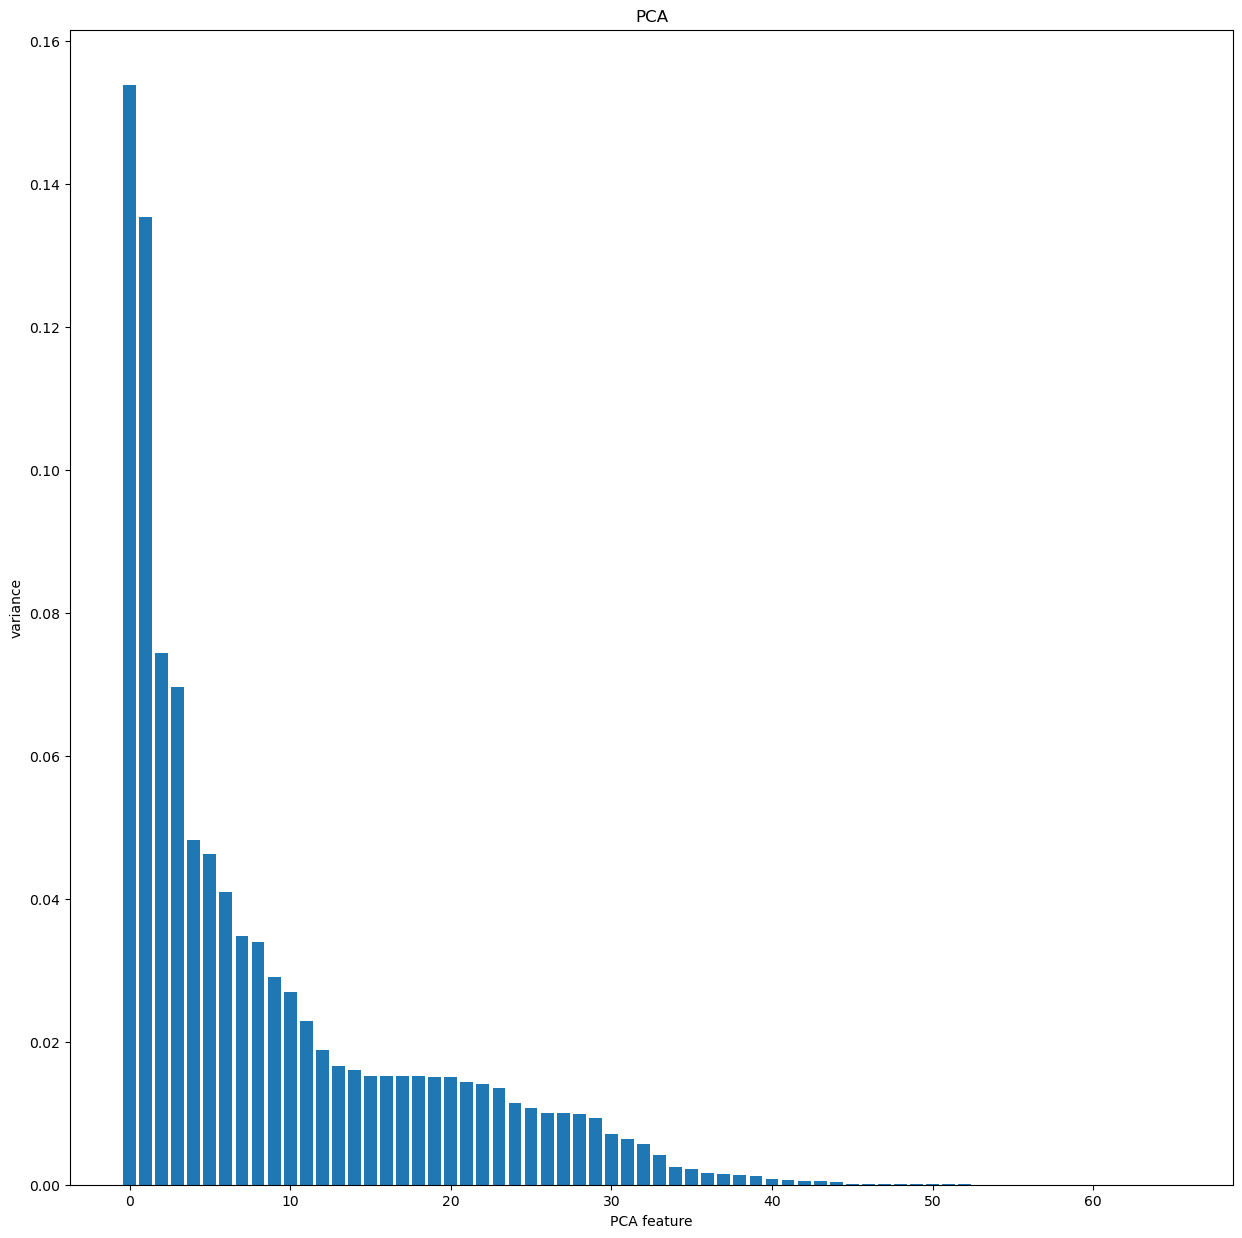

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_pca = SimpleImputer(strategy='median').fit_transform(X_train)
X_pca = StandardScaler().fit_transform(X_pca)
pca = PCA()

pca_features = pca.fit_transform(X_pca)

features = range(pca.n_components_)
plt.figure(figsize=(15, 15))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('PCA')
plt.show()

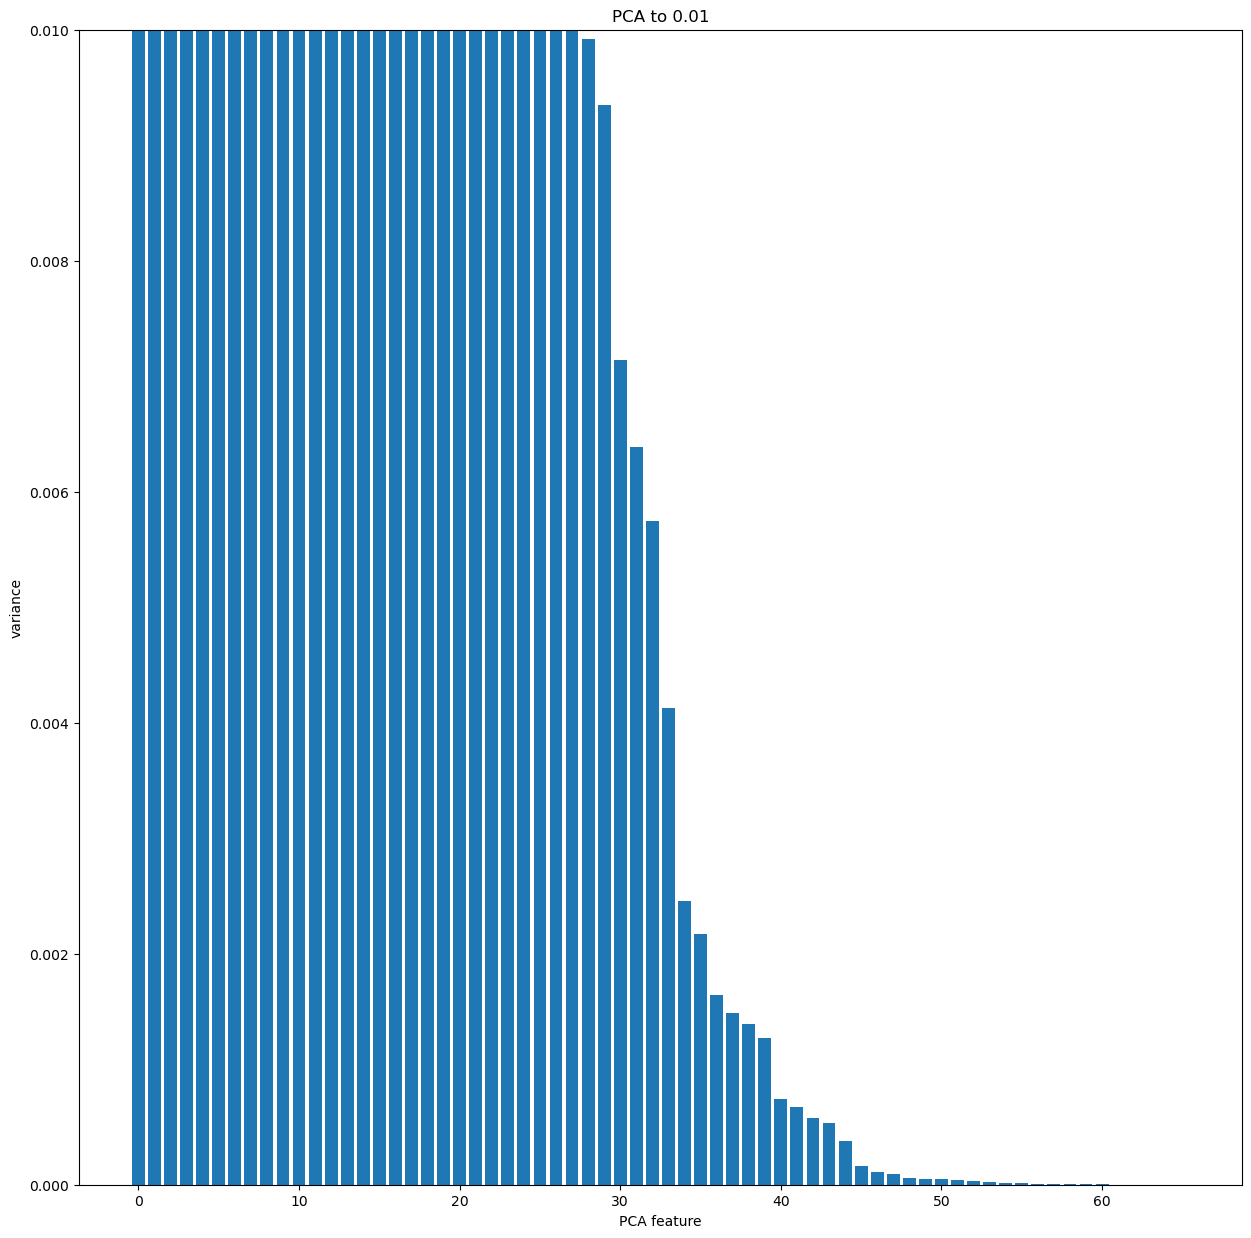

In [24]:
plt.figure(figsize=(15, 15))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.ylim([0, 0.01])
plt.title('PCA to 0.01')
plt.show()

Możemy zmniejszyć wymiarowość do około 45 nie tracąc przy tym cennnych informacji. Możemy również spróbować zmniejszyć wymiarowość do 30

# Trenowanie modeli

## Logitstic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

pipe_lr = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("scaler2", StandardScaler()),
    ("feature_selector", SelectFromModel(estimator=LogisticRegression(max_iter = 10000, class_weight="balanced"))),
    ('classifier', LogisticRegression(max_iter = 10000, class_weight="balanced"))
])

param_grid = {'pca__n_components' : [45, None],
              'feature_selector': [None, SelectFromModel(estimator=LogisticRegression(max_iter = 10000, class_weight="balanced", C=10000))],
              'classifier__C': [100, 5000, 10000, 20000, 50000],}

lr = GridSearchCV(pipe_lr, param_grid = param_grid, cv=kfold, return_train_score=True, verbose = 3, refit=True, n_jobs = -1, scoring='roc_auc')

In [26]:
lr.fit(X_train, y_train)
lr.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'classifier__C': 50000, 'feature_selector': None, 'pca__n_components': None}

In [27]:
lr.best_score_

0.8475665470605407

In [28]:
df = ps.DataFrame(lr.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
ps.set_option('display.max_colwidth', 250)
df[df['mean_test_score'] > 0.775]

,params,mean_train_score,mean_test_score
0,"{'classifier__C': 100, 'feature_selector': None, 'pca__n_components': 45}",0.835284,0.829416
1,"{'classifier__C': 100, 'feature_selector': None, 'pca__n_components': None}",0.856223,0.847379
2,"{'classifier__C': 100, 'feature_selector': SelectFromModel(estimator=LogisticRegression(C=10000, class_weight='balanced', max_iter=10000)), 'pca__n_components': 45}",0.802357,0.796721
3,"{'classifier__C': 100, 'feature_selector': SelectFromModel(estimator=LogisticRegression(C=10000, class_weight='balanced', max_iter=10000)), 'pca__n_components': None}",0.796592,0.787388
4,"{'classifier__C': 5000, 'feature_selector': None, 'pca__n_components': 45}",0.835333,0.829047
5,"{'classifier__C': 5000, 'feature_selector': None, 'pca__n_components': None}",0.856803,0.847340
6,"{'classifier__C': 5000, 'feature_selector': SelectFromModel(estimator=LogisticRegression(C=10000, class_weight='balanced', max_iter=10000)), 'pca__n_components': 45}",0.801938,0.796574
7,"{'classifier__C': 5000, 'feature_selector': SelectFromModel(estimator=LogisticRegression(C=10000, class_weight='balanced', max_iter=10000)), 'pca__n_components': None}",0.796594,0.787402
8,"{'classifier__C': 10000, 'feature_selector': None, 'pca__n_components': 45}",0.835345,0.829049
9,"{'classifier__C': 10000, 'feature_selector': None, 'pca__n_components': None}",0.856827,0.847493


In [99]:
prediction = lr.predict(X_test)
accuracy_score(y_test, prediction)

0.8240036857866851

In [30]:
f1_score(y_test, prediction)

0.2990825688073394

In [31]:
roc_auc_score(y_test, prediction)

0.786265478255668

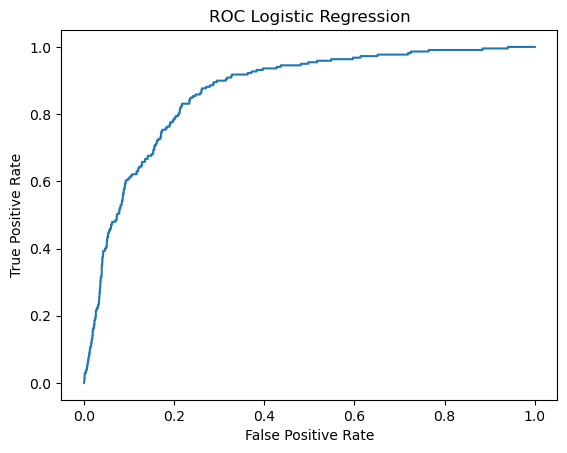

In [114]:
from sklearn.metrics import roc_curve
prob_predict = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_predict[:,1])
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Logistic Regression')
plt.show()

## SVC

### SVC Rbf

In [32]:
from sklearn.svm import SVC

pipe_svc_rbf = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("scaler2", StandardScaler()),
    ("feature_selector", SelectFromModel(estimator=SVC(kernel="linear", class_weight="balanced", max_iter = 100))),
    ('classifier', SVC(kernel="rbf", class_weight="balanced", max_iter = 10000))
])

param_grid = {'pca__n_components' : [32, 45, None],
              'classifier__C': [0.01, 0.1, 1],
              'classifier__gamma': [0.1, 1, 10]
             }

svc_rbf = GridSearchCV(pipe_svc_rbf, param_grid = param_grid, cv=kfold, return_train_score=True, verbose = 3, refit=True, n_jobs = -1, scoring='roc_auc')

In [33]:
svc_rbf.fit(X_train, y_train)
svc_rbf.best_params_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Programs\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'classifier__C': 1, 'classifier__gamma': 10, 'pca__n_components': None}

In [34]:
svc_rbf.best_score_

0.775909601338957

In [102]:
prediction = svc_rbf.predict(X_test)
accuracy_score(y_test, prediction)

0.9177608845888044

In [36]:
f1_score(y_test, prediction)

0.3276836158192091

In [37]:
roc_auc_score(y_test, prediction)

0.6713375605670874

## Tree Models

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("scaler2", StandardScaler()),
    ("feature_selector", SelectFromModel(estimator=DecisionTreeClassifier(class_weight="balanced"))),
    ('classifier', DecisionTreeClassifier(class_weight="balanced"))
])

param_grid = {'pca__n_components' : [45, None],
              'feature_selector': [None, SelectFromModel(estimator=DecisionTreeClassifier(class_weight="balanced"))],
              'classifier__splitter': ['best', 'random'],
              'classifier__criterion' : ['gini', 'entropy'],
              'classifier__min_samples_leaf': [8, 12, 14],
              'classifier__max_depth': [3, 6, 10]
             }

dt = GridSearchCV(pipe_dt, param_grid = param_grid, cv=kfold, return_train_score=True, verbose = 3, refit=True, n_jobs = -1, scoring='roc_auc')

In [40]:
dt.fit(X_train, y_train)
dt.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 8,
 'classifier__splitter': 'best',
 'feature_selector': SelectFromModel(estimator=DecisionTreeClassifier(class_weight='balanced')),
 'pca__n_components': None}

In [41]:
dt.best_score_

0.8559015553245505

In [42]:
df = ps.DataFrame(dt.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
ps.set_option('display.max_colwidth', 250)
df[df['mean_test_score'] > 0.81]

,params,mean_train_score,mean_test_score
0,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 8, 'classifier__splitter': 'best', 'feature_selector': None, 'pca__n_components': 45}",0.825637,0.812443
1,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 8, 'classifier__splitter': 'best', 'feature_selector': None, 'pca__n_components': None}",0.830605,0.821840
2,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 8, 'classifier__splitter': 'best', 'feature_selector': SelectFromModel(estimator=DecisionTreeClassifier(class_weight='balanced')), 'pca__n_components': 45}",0.824617,0.811172
3,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 8, 'classifier__splitter': 'best', 'feature_selector': SelectFromModel(estimator=DecisionTreeClassifier(class_weight='balanced')), 'pca__n_components': ...",0.829906,0.820956
8,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 12, 'classifier__splitter': 'best', 'feature_selector': None, 'pca__n_components': 45}",0.825637,0.812443
9,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 12, 'classifier__splitter': 'best', 'feature_selector': None, 'pca__n_components': None}",0.830605,0.821840
10,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 12, 'classifier__splitter': 'best', 'feature_selector': SelectFromModel(estimator=DecisionTreeClassifier(class_weight='balanced')), 'pca__n_components':...",0.825162,0.811883
11,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 12, 'classifier__splitter': 'best', 'feature_selector': SelectFromModel(estimator=DecisionTreeClassifier(class_weight='balanced')), 'pca__n_components':...",0.829906,0.820956
16,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 14, 'classifier__splitter': 'best', 'feature_selector': None, 'pca__n_components': 45}",0.825637,0.812443
17,"{'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 14, 'classifier__splitter': 'best', 'feature_selector': None, 'pca__n_components': None}",0.830605,0.821840


In [104]:
prediction = dt.predict(X_test)
accuracy_score(y_test, prediction)

0.7756277355448054

In [44]:
f1_score(y_test, prediction)

0.26212121212121214

In [45]:
roc_auc_score(y_test, prediction)

0.7824104537629692

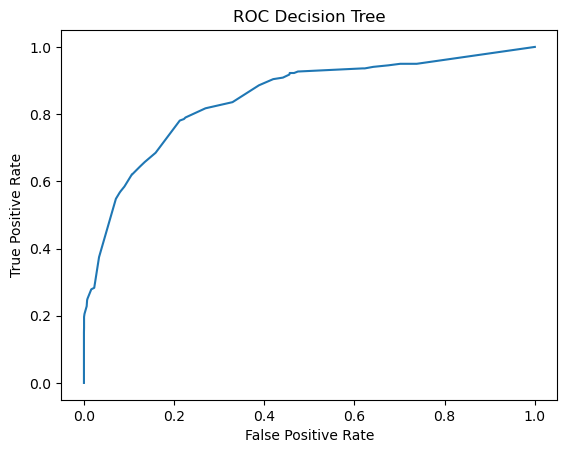

In [116]:
from sklearn.metrics import roc_curve
prob_predict = dt.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_predict[:,1])
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Decision Tree')
plt.show()

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("scaler2", StandardScaler()),
    ("feature_selector", SelectFromModel(estimator=RandomForestClassifier(class_weight="balanced", max_depth= 8))),
    ('classifier', RandomForestClassifier(class_weight="balanced"))
])

param_grid = {'pca__n_components' : [45, None],
              'feature_selector': [None, SelectFromModel(estimator=RandomForestClassifier(class_weight="balanced", max_depth= 4))],
              'classifier__n_estimators': [500, 1000],
              'classifier__criterion' : ['entropy'],
              'classifier__max_depth' : [4, 8],
             }

rf = GridSearchCV(pipe_rf, param_grid = param_grid, cv=kfold, return_train_score=True, verbose = 3, refit=True, n_jobs = -1, scoring='roc_auc')

In [47]:
rf.fit(X_train, y_train)
rf.best_params_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


{'classifier__criterion': 'entropy',
 'classifier__max_depth': 8,
 'classifier__n_estimators': 500,
 'feature_selector': None,
 'pca__n_components': None}

In [48]:
rf.best_score_

0.9037924856286377

In [49]:
df = ps.DataFrame(rf.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
ps.set_option('display.max_colwidth', 250)
df[df['mean_test_score'] > 0.81]

,params,mean_train_score,mean_test_score
0,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__n_estimators': 500, 'feature_selector': None, 'pca__n_components': 45}",0.866507,0.853070
1,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__n_estimators': 500, 'feature_selector': None, 'pca__n_components': None}",0.876584,0.863117
2,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__n_estimators': 500, 'feature_selector': SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced', max_d...",0.861636,0.847770
3,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__n_estimators': 500, 'feature_selector': SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced', max_d...",0.869965,0.857449
4,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__n_estimators': 1000, 'feature_selector': None, 'pca__n_components': 45}",0.866572,0.853185
5,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__n_estimators': 1000, 'feature_selector': None, 'pca__n_components': None}",0.876563,0.863158
6,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__n_estimators': 1000, 'feature_selector': SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced', max_...",0.861789,0.849039
7,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__n_estimators': 1000, 'feature_selector': SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced', max_...",0.870034,0.857365
8,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__n_estimators': 500, 'feature_selector': None, 'pca__n_components': 45}",0.951097,0.879577
9,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__n_estimators': 500, 'feature_selector': None, 'pca__n_components': None}",0.968877,0.903792


In [106]:
prediction = rf.predict(X_test)
accuracy_score(y_test, prediction)

0.9011748445058743

In [51]:
f1_score(y_test, prediction)

0.40499306518723993

In [52]:
roc_auc_score(y_test, prediction)

0.7901504124211547

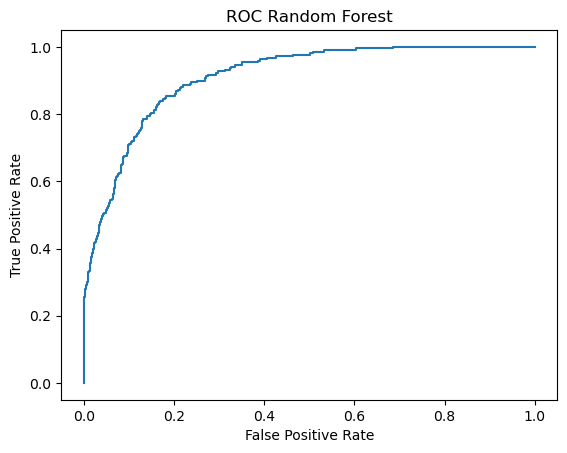

In [117]:
from sklearn.metrics import roc_curve
prob_predict = rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_predict[:,1])
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Random Forest')
plt.show()

### XGBoost

In [54]:
from xgboost import XGBClassifier

pipe_xgb = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("scaler2", StandardScaler()),
    ("feature_selector", SelectFromModel(estimator=XGBClassifier(scale_pos_weight=20))),
    ('classifier', XGBClassifier(scale_pos_weight=20))
])

param_grid = {'pca__n_components' : [None, 45],
              'feature_selector': [None, SelectFromModel(estimator=XGBClassifier(scale_pos_weight=20, max_depth = 5, n_estimators = 20))],
              'classifier__max_depth': [4, 8],
              'classifier__learning_rate' : [0.01,  0.1],
              "classifier__n_estimators": [ 50, 150]}

xgb = GridSearchCV(pipe_xgb, param_grid = param_grid, cv=kfold, return_train_score=True, verbose = 3, refit=True, n_jobs = -1)

In [55]:
xgb.fit(X_train, y_train)
xgb.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 8,
 'classifier__n_estimators': 150,
 'feature_selector': None,
 'pca__n_components': None}

In [56]:
xgb.best_score_

0.9663884233151965

In [108]:
prediction = xgb.predict(X_test)
accuracy_score(y_test, prediction)

0.9638332181524994

In [58]:
f1_score(y_test, prediction)

0.6005089058524172

In [59]:
roc_auc_score(y_test, prediction)

0.7626135736741707

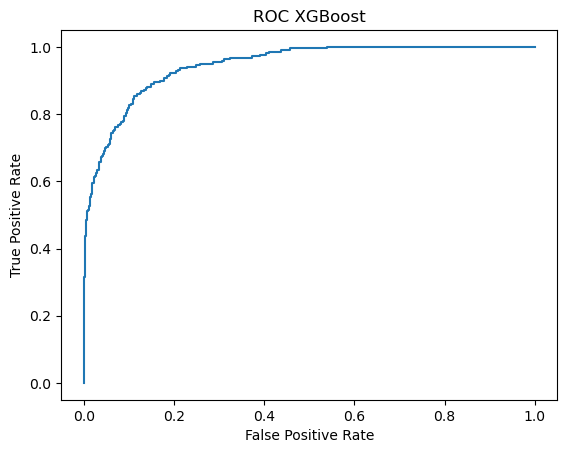

In [118]:
from sklearn.metrics import roc_curve
prob_predict = xgb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_predict[:,1])
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC XGBoost')
plt.show()

### CatBoost

In [67]:
from catboost import CatBoostClassifier

pipe_cat = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("scaler2", StandardScaler()),
    ("feature_selector", SelectFromModel(estimator=CatBoostClassifier(auto_class_weights="Balanced"))),
    ('classifier', CatBoostClassifier(auto_class_weights="Balanced"))
])

param_grid = {'pca__n_components' : [32, 45, None],
              'feature_selector': [None, SelectFromModel(estimator=CatBoostClassifier(auto_class_weights="Balanced", depth = 5, iterations = 100))],
              'classifier__depth': [5, 8],
              'classifier__learning_rate' : [0.01, 0.1],
              'classifier__iterations' : [150, 300]}

cat = GridSearchCV(pipe_cat, param_grid = param_grid, cv=kfold, return_train_score=True, verbose = 3, refit=True, n_jobs = -1)

In [68]:
cat.fit(X_train, y_train)
cat.best_params_

Fitting 10 folds for each of 48 candidates, totalling 480 fits
0:	learn: 0.6399204	total: 40.5ms	remaining: 12.1s
1:	learn: 0.5984072	total: 82.6ms	remaining: 12.3s
2:	learn: 0.5662126	total: 124ms	remaining: 12.2s
3:	learn: 0.5384083	total: 164ms	remaining: 12.1s
4:	learn: 0.5142667	total: 204ms	remaining: 12s
5:	learn: 0.4947383	total: 243ms	remaining: 11.9s
6:	learn: 0.4781182	total: 286ms	remaining: 12s
7:	learn: 0.4621782	total: 333ms	remaining: 12.2s
8:	learn: 0.4508166	total: 373ms	remaining: 12.1s
9:	learn: 0.4396852	total: 413ms	remaining: 12s
10:	learn: 0.4261852	total: 452ms	remaining: 11.9s
11:	learn: 0.4130656	total: 493ms	remaining: 11.8s
12:	learn: 0.4031748	total: 535ms	remaining: 11.8s
13:	learn: 0.3945917	total: 576ms	remaining: 11.8s
14:	learn: 0.3840508	total: 649ms	remaining: 12.3s
15:	learn: 0.3774916	total: 724ms	remaining: 12.9s
16:	learn: 0.3708927	total: 792ms	remaining: 13.2s
17:	learn: 0.3640400	total: 842ms	remaining: 13.2s
18:	learn: 0.3564164	total: 889ms

164:	learn: 0.0970738	total: 6.6s	remaining: 5.4s
165:	learn: 0.0965821	total: 6.63s	remaining: 5.35s
166:	learn: 0.0957388	total: 6.67s	remaining: 5.31s
167:	learn: 0.0949242	total: 6.71s	remaining: 5.27s
168:	learn: 0.0942496	total: 6.75s	remaining: 5.23s
169:	learn: 0.0935501	total: 6.78s	remaining: 5.19s
170:	learn: 0.0926307	total: 6.83s	remaining: 5.15s
171:	learn: 0.0916183	total: 6.87s	remaining: 5.11s
172:	learn: 0.0906751	total: 6.9s	remaining: 5.07s
173:	learn: 0.0901865	total: 6.94s	remaining: 5.02s
174:	learn: 0.0897616	total: 6.97s	remaining: 4.98s
175:	learn: 0.0889566	total: 7.01s	remaining: 4.94s
176:	learn: 0.0881613	total: 7.05s	remaining: 4.9s
177:	learn: 0.0872990	total: 7.09s	remaining: 4.86s
178:	learn: 0.0868348	total: 7.12s	remaining: 4.82s
179:	learn: 0.0860349	total: 7.16s	remaining: 4.77s
180:	learn: 0.0854567	total: 7.2s	remaining: 4.73s
181:	learn: 0.0847000	total: 7.24s	remaining: 4.69s
182:	learn: 0.0840971	total: 7.27s	remaining: 4.65s
183:	learn: 0.083

{'classifier__depth': 8,
 'classifier__iterations': 300,
 'classifier__learning_rate': 0.1,
 'feature_selector': None,
 'pca__n_components': None}

In [69]:
prediction = cat.predict(X_test)
accuracy_score(y_test, prediction)

0.9640635798203179

In [70]:
f1_score(y_test, prediction)

0.6355140186915889

In [71]:
roc_auc_score(y_test, prediction)

0.8016473583112335

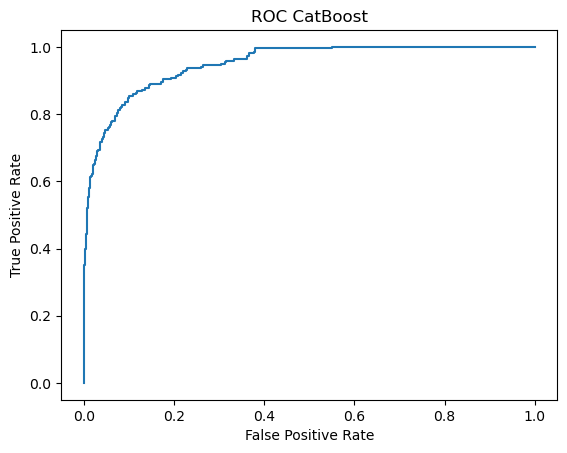

In [119]:
from sklearn.metrics import roc_curve
prob_predict = cat.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_predict[:,1])
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC CatBoost')
plt.show()

## PyTorch

In [72]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchmetrics import Recall, Accuracy, F1Score, AUROC, ROC

In [73]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
X_train

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold,equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,miss sales (n) / sales (n-1),miss profit on operating activities / financial expenses,groupCount
19591,-0.018829,0.731550,-0.128680,0.73824,-85.7980,0.000000,-0.023753,0.366950,1.03900,0.268450,-0.002752,-0.04832,0.090616,-0.023753,2836.00,0.128700,1.3670,-0.023753,-0.022861,30.416,0.63861,-0.003879,-0.018122,-0.031264,0.21300,0.135430,-0.184690,-0.20198,4.1855,0.697570,-0.002648,167.490,2.1793,1.464400,-0.032283,1.03900,0.446930,-0.031071,0.038113,0.213860,-0.003733,120.900,90.488,-0.217470,0.56211,29.499,-0.121780,-0.117210,0.49607,0.491580,0.458870,0.42136,0.70150,-1972.60,-0.031071,-0.070140,1.02220,0.664870,12.0000,4.0337,172.690,2.1136,1.63080,0,0,0
16564,0.006295,0.028027,0.247250,9.82170,259.6700,0.017250,0.007403,17.677000,0.87871,0.495440,0.007403,0.26412,0.197840,0.007403,189.81,1.923000,35.6800,0.007403,0.027173,76.555,1.04360,-0.001558,0.023109,0.019600,0.49544,1.883500,-0.050256,0.34116,4.6037,-0.626850,0.027173,32.996,11.0620,-0.055592,-0.001558,0.37568,0.495440,-0.005719,7.093700,0.020506,-0.005719,102.440,25.885,0.110180,7.78300,67.269,-0.048051,-0.176380,9.82170,0.028027,0.090401,0.68362,0.68362,9927.50,-0.138030,0.012707,1.13800,0.000000,4.7678,14.1010,37.551,9.7201,0.37590,0,0,1
20831,0.061889,0.197860,0.628760,6.06170,80.8210,0.000000,0.066180,4.054000,1.76780,0.802140,0.066180,0.53276,0.053487,0.066180,763.77,0.477890,5.0540,0.066180,0.037435,50.082,0.72493,0.048427,0.035008,0.357530,0.77444,0.456210,NaN,2.54540,3.2342,-0.133830,0.037435,26.465,13.7920,8.658500,0.054645,1.76780,0.8021

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

class MyTransformer:
    def __init__(self):
        self.imputer = SimpleImputer(strategy='median')
        self.scaler = StandardScaler()
    def fit(self, X):
        X_mod = self.imputer.fit_transform(X)
        self.scaler.fit(X_mod)
        return self
    def transform(self, X):
        X = self.imputer.transform(X)
        X = self.scaler.transform(X)
        return X
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
transformer = MyTransformer()
X_train = transformer.fit_transform(X_train)
X_train

array([[-1.80493783e-02,  2.34991852e-02, -4.37447512e-02, ...,
        -3.94661772e-01, -2.62662768e-01, -9.61180615e-01],
       [-9.75418175e-03, -9.45700345e-02,  2.50423067e-02, ...,
        -3.94661772e-01, -2.62662768e-01,  3.93434429e-01],
       [ 8.60077085e-03, -6.60676973e-02,  9.48503839e-02, ...,
        -3.94661772e-01,  3.80716311e+00,  1.74804947e+00],
       ...,
       [-3.79420680e-02, -2.73868022e-03, -2.81340520e-03, ...,
        -3.94661772e-01, -2.62662768e-01, -9.61180615e-01],
       [-3.14083886e-03,  7.85111964e-03,  4.35999728e-02, ...,
        -3.94661772e-01, -2.62662768e-01, -9.61180615e-01],
       [ 1.58158370e-02, -5.00235631e-02,  2.01220184e-02, ...,
        -3.94661772e-01, -2.62662768e-01, -9.61180615e-01]])

In [75]:
class MyDataset(Dataset):
    def __init__(self, features, target):      
        self.features = torch.tensor(features).to(torch.float32)
        self.target = torch.tensor(target.values).to(torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.target[idx]
        return x, y

In [76]:
dataset = MyDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [77]:
valid_dataset = MyDataset(transformer.transform(X_valid), y_valid)
valid_dataloader = DataLoader(valid_dataset, batch_size=len(valid_dataset), shuffle=True)

In [78]:
test_dataset = MyDataset(transformer.transform(X_test), y_test)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

## Funkcje obsługujące trenowanie

In [79]:
def train(dataloader, model, loss_fn, optimizer, history):
    size = len(dataloader)
    model.train()
    recall = Recall(task="binary")
    acc = Accuracy(task="binary")
    f1 = F1Score(task="binary")
    auroc = AUROC(task="binary")
    stack_loss, stack_acc, stack_recall, stack_f1, stack_auroc = 0, 0, 0, 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))
        
        #stack
        stack_loss += loss
        stack_acc += acc(pred, y.unsqueeze(1))
        stack_recall += recall(pred, y.unsqueeze(1))
        stack_f1 += f1(pred, y.unsqueeze(1))
        stack_auroc += auroc(pred, y.unsqueeze(1))
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 200 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}, Recall: {recall(pred, y.unsqueeze(1))} acc: {acc(pred, y.unsqueeze(1))}  [{current:>5d}/{size:>5d}]")
    acc = stack_acc/size
    loss = stack_loss/size
    auc = stack_auroc/size
    f1 = stack_f1/size
    recall = stack_recall/size
    history.loc[len(history.index)] = [acc.item(), loss.item(), auc.item(), f1.item(), recall.item()] 
    print(f"Train Error: \n Accuracy: {acc}, Recall: {recall} F1Score: {f1} AUC: {auc} Avg loss: {loss:>8f} \n")

def test(dataloader, model, loss_fn, best_auc, history, save = False):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    recall = Recall(task="binary")
    acc = Accuracy(task="binary")
    rec = Recall(task="binary")
    f1 = F1Score(task="binary")
    aur = AUROC(task="binary")
    test_loss, correct, recall, f1_score, auroc = 0, 0, 0, 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss = loss_fn(pred, y.unsqueeze(1)).item()
            correct = acc(pred, y.unsqueeze(1))
            recall = rec(pred, y.unsqueeze(1))
            f1_score = f1(pred, y.unsqueeze(1)) 
            auroc = aur(pred, y.unsqueeze(1))
    if(best_auc < auroc and save):
        best_auc = auroc
        print(f"Saving model: model-{test_loss}-{auroc}")
        torch.save(model, f'checkpoint/model-{test_loss}-{auroc}.pth')
    history.loc[len(history.index)] = [correct.item(), test_loss, auroc.item(), f1_score.item(), recall.item()]
    print(f"Test Error: \n Accuracy: {correct}, Recall: {recall} F1Score: {f1_score} AUC: {auroc} Avg loss: {test_loss:>8f} \n")
    if save:
        return best_auc
    else:
        return ['PyTorch', correct.item(), auroc.item(), f1_score.item(), recall.item()]

## Model

In [80]:
class SimpleNetwork(nn.Module):
    def __init__(self, input_size):
        super(SimpleNetwork, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(input_size, 2048),
            nn.BatchNorm1d(2048),
            nn.ELU(),
            nn.Dropout(p=0.1),
            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ELU(),
            nn.Dropout(p=0.1),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ELU(),
            nn.Dropout(p=0.1),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ELU(),
            nn.Dropout(p=0.1),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ELU(),
            nn.Dropout(p=0.1),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ELU(),
            nn.Dropout(p=0.1),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ELU(),
            nn.Dropout(p=0.1),
            nn.Linear(64, 16),
            nn.BatchNorm1d(16),
            nn.ELU(),
            nn.Dropout(p=0.1),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.ELU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.seq(x)

In [81]:
model = SimpleNetwork(X_train.shape[1])
best_auc = 0
history_train = ps.DataFrame(columns=['Accuracy', 'Loss', 'AUC', 'F1 Score', 'Recall'])
history_valid = ps.DataFrame(columns=['Accuracy', 'Loss', 'AUC', 'F1 Score', 'Recall'])

In [82]:
# Training loop
criterion = nn.BCEWithLogitsLoss(pos_weight =torch.tensor([20]))
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(dataloader, model, criterion, optimizer, history_train)
    best_auc = test(valid_dataloader, model, criterion, best_auc, history_valid, True)
print("Done!")

Epoch 1
-------------------------------
loss: 1.230801, Recall: 0.0 acc: 0.828125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.096568, Recall: 1.0 acc: 0.8125  [12864/  550]
loss: 1.695331, Recall: 0.5 acc: 0.75  [25664/  550]
Train Error: 
 Accuracy: 0.7507061958312988, Recall: 0.6687869429588318 F1Score: 0.20586325228214264 AUC: 0.7636055946350098 Avg loss: 1.286460 

Saving model: model-1.2788220643997192-0.8176312446594238
Test Error: 
 Accuracy: 0.8152034878730774, Recall: 0.6844919919967651 F1Score: 0.2617586851119995 AUC: 0.8176312446594238 Avg loss: 1.278822 

Epoch 2
-------------------------------
loss: 1.435519, Recall: 0.5 acc: 0.765625  [   64/  550]
loss: 1.029410, Recall: 1.0 acc: 0.671875  [12864/  550]
loss: 0.913368, Recall: 0.0 acc: 0.703125  [25664/  550]
Train Error: 
 Accuracy: 0.7491680383682251, Recall: 0.7146068215370178 F1Score: 0.21214431524276733 AUC: 0.7930068373680115 Avg loss: 1.256453 

Saving model: model-1.2579219341278076-0.8322421908378601
Test Error: 
 Accuracy: 0.7962630987167358, Recall: 0.7165775299072266 F1Score: 0.2518796920776367 AUC: 0.8322421908378601 Avg lo

D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.173797, Recall: 0.5 acc: 0.796875  [12864/  550]
loss: 1.459011, Recall: 0.25 acc: 0.75  [25664/  550]
Train Error: 
 Accuracy: 0.7680073380470276, Recall: 0.6992054581642151 F1Score: 0.22323448956012726 AUC: 0.792311429977417 Avg loss: 1.237696 

Test Error: 
 Accuracy: 0.7486562728881836, Recall: 0.7700534462928772 F1Score: 0.22677165269851685 AUC: 0.8261557817459106 Avg loss: 1.273022 

Epoch 4
-------------------------------
loss: 1.160509, Recall: 0.5 acc: 0.71875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.055237, Recall: 0.0 acc: 0.765625  [12864/  550]
loss: 1.212783, Recall: 1.0 acc: 0.75  [25664/  550]
Train Error: 
 Accuracy: 0.7876055240631104, Recall: 0.6737930774688721 F1Score: 0.23126153647899628 AUC: 0.7902628183364868 Avg loss: 1.223418 

Test Error: 
 Accuracy: 0.8259534239768982, Recall: 0.6577540040016174 F1Score: 0.26565873622894287 AUC: 0.8281280398368835 Avg loss: 1.220629 

Epoch 5
-------------------------------
loss: 1.123967, Recall: 0.5 acc: 0.75  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.131115, Recall: 0.5 acc: 0.78125  [12864/  550]
loss: 1.193732, Recall: 1.0 acc: 0.859375  [25664/  550]
Train Error: 
 Accuracy: 0.7932615876197815, Recall: 0.6683787107467651 F1Score: 0.2374001294374466 AUC: 0.7918561697006226 Avg loss: 1.211277 

Test Error: 
 Accuracy: 0.871768593788147, Recall: 0.5561497211456299 F1Score: 0.29337093234062195 AUC: 0.8125552535057068 Avg loss: 1.241477 

Epoch 6
-------------------------------
loss: 1.180086, Recall: 0.6666666865348816 acc: 0.8125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.943045, Recall: 1.0 acc: 0.734375  [12864/  550]
loss: 1.348967, Recall: 0.800000011920929 acc: 0.875  [25664/  550]
Train Error: 
 Accuracy: 0.8055641055107117, Recall: 0.6626392006874084 F1Score: 0.24462582170963287 AUC: 0.7959157824516296 Avg loss: 1.203490 

Test Error: 
 Accuracy: 0.8720245957374573, Recall: 0.5401069521903992 F1Score: 0.2877492904663086 AUC: 0.8155210614204407 Avg loss: 1.218675 

Epoch 7
-------------------------------
loss: 1.427401, Recall: 0.5 acc: 0.765625  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.917590, Recall: 1.0 acc: 0.84375  [12864/  550]
loss: 1.004904, Recall: 1.0 acc: 0.8125  [25664/  550]
Train Error: 
 Accuracy: 0.8113582134246826, Recall: 0.6563902497291565 F1Score: 0.24756963551044464 AUC: 0.789136528968811 Avg loss: 1.196975 

Test Error: 
 Accuracy: 0.86818528175354, Recall: 0.5401069521903992 F1Score: 0.28172942996025085 AUC: 0.8223722577095032 Avg loss: 1.204872 

Epoch 8
-------------------------------
loss: 1.287151, Recall: 1.0 acc: 0.875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.111717, Recall: 0.5 acc: 0.84375  [12864/  550]
loss: 0.903333, Recall: 1.0 acc: 0.828125  [25664/  550]
Train Error: 
 Accuracy: 0.82570481300354, Recall: 0.6550470590591431 F1Score: 0.2585904598236084 AUC: 0.7953960299491882 Avg loss: 1.189061 

Test Error: 
 Accuracy: 0.9244945049285889, Recall: 0.4224599003791809 F1Score: 0.3487858772277832 AUC: 0.8212997913360596 Avg loss: 1.200644 

Epoch 9
-------------------------------
loss: 1.134080, Recall: 1.0 acc: 0.796875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.062590, Recall: 0.5 acc: 0.78125  [12864/  550]
loss: 1.253546, Recall: 0.75 acc: 0.875  [25664/  550]
Train Error: 
 Accuracy: 0.825730562210083, Recall: 0.6409803628921509 F1Score: 0.2592006325721741 AUC: 0.7892622947692871 Avg loss: 1.188113 

Test Error: 
 Accuracy: 0.9083696007728577, Recall: 0.4491978585720062 F1Score: 0.3193916380405426 AUC: 0.8292508125305176 Avg loss: 1.207854 

Epoch 10
-------------------------------
loss: 1.393624, Recall: 0.5 acc: 0.78125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.547857, Recall: 0.4000000059604645 acc: 0.828125  [12864/  550]
loss: 1.166927, Recall: 0.6666666865348816 acc: 0.828125  [25664/  550]
Train Error: 
 Accuracy: 0.8311634659767151, Recall: 0.6325238943099976 F1Score: 0.2625911235809326 AUC: 0.7907535433769226 Avg loss: 1.183256 

Test Error: 
 Accuracy: 0.9001791477203369, Recall: 0.47058823704719543 F1Score: 0.3109540641307831 AUC: 0.8218992948532104 Avg loss: 1.215067 

Done!


**Zmniejszamy learning rate**

In [84]:
# Training loop
criterion = nn.BCEWithLogitsLoss(pos_weight =torch.tensor([20]))
optimizer = optim.Adam(model.parameters(), lr=0.00001)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(dataloader, model, criterion, optimizer, history_train)
    best_auc = test(valid_dataloader, model, criterion, best_auc, history_valid, True)
print("Done!")

Epoch 1
-------------------------------
loss: 1.655573, Recall: 0.5 acc: 0.828125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.066984, Recall: 1.0 acc: 0.859375  [12864/  550]
loss: 0.813613, Recall: 0.0 acc: 0.8125  [25664/  550]
Train Error: 
 Accuracy: 0.8365895748138428, Recall: 0.6423342227935791 F1Score: 0.2716004550457001 AUC: 0.8033480644226074 Avg loss: 1.178339 

Test Error: 
 Accuracy: 0.8837983012199402, Recall: 0.5721924901008606 F1Score: 0.3203592896461487 AUC: 0.8263081908226013 Avg loss: 1.188222 

Epoch 2
-------------------------------
loss: 1.297373, Recall: 0.0 acc: 0.78125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.008601, Recall: 1.0 acc: 0.859375  [12864/  550]
loss: 0.876845, Recall: 1.0 acc: 0.90625  [25664/  550]
Train Error: 
 Accuracy: 0.8422930240631104, Recall: 0.6533010601997375 F1Score: 0.27743709087371826 AUC: 0.8141415119171143 Avg loss: 1.172613 

Test Error: 
 Accuracy: 0.8720245957374573, Recall: 0.614973247051239 F1Score: 0.31506848335266113 AUC: 0.8292392492294312 Avg loss: 1.176480 

Epoch 3
-------------------------------
loss: 1.085875, Recall: 1.0 acc: 0.875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.745305, Recall: 0.3333333432674408 acc: 0.796875  [12864/  550]
loss: 1.133300, Recall: 0.6666666865348816 acc: 0.859375  [25664/  550]
Train Error: 
 Accuracy: 0.8414691686630249, Recall: 0.6562831997871399 F1Score: 0.2768687903881073 AUC: 0.8021867871284485 Avg loss: 1.173284 

Test Error: 
 Accuracy: 0.8443818688392639, Recall: 0.6203208565711975 F1Score: 0.27619048953056335 AUC: 0.8263074159622192 Avg loss: 1.186092 

Epoch 4
-------------------------------
loss: 0.988368, Recall: 1.0 acc: 0.8125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.977365, Recall: 1.0 acc: 0.84375  [12864/  550]
loss: 1.556333, Recall: 0.6666666865348816 acc: 0.84375  [25664/  550]
Train Error: 
 Accuracy: 0.8413284420967102, Recall: 0.6646016240119934 F1Score: 0.28310486674308777 AUC: 0.8112915754318237 Avg loss: 1.171322 

Test Error: 
 Accuracy: 0.9009470343589783, Recall: 0.5508021116256714 F1Score: 0.3473861813545227 AUC: 0.8195072412490845 Avg loss: 1.190155 

Epoch 5
-------------------------------
loss: 1.409075, Recall: 0.6000000238418579 acc: 0.84375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.539943, Recall: 0.6666666865348816 acc: 0.84375  [12864/  550]
loss: 1.043080, Recall: 0.5 acc: 0.859375  [25664/  550]
Train Error: 
 Accuracy: 0.8418709635734558, Recall: 0.6451167464256287 F1Score: 0.27941566705703735 AUC: 0.8042072653770447 Avg loss: 1.171230 

Test Error: 
 Accuracy: 0.8894292116165161, Recall: 0.5775400996208191 F1Score: 0.3333333432674408 AUC: 0.8256785273551941 Avg loss: 1.182515 

Epoch 6
-------------------------------
loss: 1.095316, Recall: 0.5 acc: 0.84375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.901336, Recall: 1.0 acc: 0.828125  [12864/  550]
loss: 1.134976, Recall: 0.6666666865348816 acc: 0.828125  [25664/  550]
Train Error: 
 Accuracy: 0.8419845700263977, Recall: 0.6341556906700134 F1Score: 0.2762569487094879 AUC: 0.7987369298934937 Avg loss: 1.174078 

Saving model: model-1.19123113155365-0.8325124979019165
Test Error: 
 Accuracy: 0.8988994359970093, Recall: 0.5454545617103577 F1Score: 0.34056761860847473 AUC: 0.8325124979019165 Avg loss: 1.191231 

Epoch 7
-------------------------------
loss: 0.979589, Recall: 1.0 acc: 0.890625  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.289792, Recall: 0.3333333432674408 acc: 0.796875  [12864/  550]
loss: 1.337903, Recall: 0.5 acc: 0.84375  [25664/  550]
Train Error: 
 Accuracy: 0.8442572951316833, Recall: 0.654829740524292 F1Score: 0.2806447446346283 AUC: 0.8102179765701294 Avg loss: 1.170899 

Saving model: model-1.1843810081481934-0.8358374834060669
Test Error: 
 Accuracy: 0.8832864165306091, Recall: 0.5828877091407776 F1Score: 0.32344213128089905 AUC: 0.8358374834060669 Avg loss: 1.184381 

Epoch 8
-------------------------------
loss: 1.387948, Recall: 0.5 acc: 0.796875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.884942, Recall: 1.0 acc: 0.84375  [12864/  550]
loss: 0.888614, Recall: 1.0 acc: 0.875  [25664/  550]
Train Error: 
 Accuracy: 0.840846836566925, Recall: 0.6566991806030273 F1Score: 0.28012290596961975 AUC: 0.8144342303276062 Avg loss: 1.169165 

Test Error: 
 Accuracy: 0.8786792755126953, Recall: 0.5614973306655884 F1Score: 0.3070175349712372 AUC: 0.8295554518699646 Avg loss: 1.185894 

Epoch 9
-------------------------------
loss: 1.137690, Recall: 0.6666666865348816 acc: 0.828125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.361522, Recall: 0.5 acc: 0.828125  [12864/  550]
loss: 1.179761, Recall: 0.75 acc: 0.875  [25664/  550]
Train Error: 
 Accuracy: 0.8455600738525391, Recall: 0.6553975939750671 F1Score: 0.2880789637565613 AUC: 0.8099532127380371 Avg loss: 1.167499 

Saving model: model-1.1822397708892822-0.8360416889190674
Test Error: 
 Accuracy: 0.8620424866676331, Recall: 0.6310160160064697 F1Score: 0.30451613664627075 AUC: 0.8360416889190674 Avg loss: 1.182240 

Epoch 10
-------------------------------
loss: 1.089413, Recall: 0.5 acc: 0.84375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.801502, Recall: 0.0 acc: 0.859375  [12864/  550]
loss: 1.366148, Recall: 0.5 acc: 0.828125  [25664/  550]
Train Error: 
 Accuracy: 0.8454775214195251, Recall: 0.6512022018432617 F1Score: 0.2843467593193054 AUC: 0.8052734732627869 Avg loss: 1.169747 

Test Error: 
 Accuracy: 0.8896851539611816, Recall: 0.51871657371521 F1Score: 0.31040000915527344 AUC: 0.8206256628036499 Avg loss: 1.198815 

Done!


In [85]:
# Training loop
criterion = nn.BCEWithLogitsLoss(pos_weight =torch.tensor([20]))
optimizer = optim.Adam(model.parameters(), lr=0.000001)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(dataloader, model, criterion, optimizer, history_train)
    best_auc = test(valid_dataloader, model, criterion, best_auc, history_valid, True)
print("Done!")

Epoch 1
-------------------------------
loss: 1.220591, Recall: 0.75 acc: 0.875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.208682, Recall: 1.0 acc: 0.90625  [12864/  550]
loss: 1.447357, Recall: 0.6000000238418579 acc: 0.828125  [25664/  550]
Train Error: 
 Accuracy: 0.8453922867774963, Recall: 0.6523182392120361 F1Score: 0.283540278673172 AUC: 0.8103458285331726 Avg loss: 1.167753 

Test Error: 
 Accuracy: 0.8855899572372437, Recall: 0.5828877091407776 F1Score: 0.3278195559978485 AUC: 0.8324757814407349 Avg loss: 1.185962 

Epoch 2
-------------------------------
loss: 1.091045, Recall: 0.5 acc: 0.84375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.209767, Recall: 1.0 acc: 0.921875  [12864/  550]
loss: 1.090798, Recall: 0.5 acc: 0.828125  [25664/  550]
Train Error: 
 Accuracy: 0.8453354835510254, Recall: 0.6494950652122498 F1Score: 0.2840368151664734 AUC: 0.8129855394363403 Avg loss: 1.168267 

Test Error: 
 Accuracy: 0.8853340148925781, Recall: 0.5721924901008606 F1Score: 0.3232628405094147 AUC: 0.8206931352615356 Avg loss: 1.219287 

Epoch 3
-------------------------------
loss: 0.886002, Recall: 1.0 acc: 0.875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.015069, Recall: 0.0 acc: 0.8125  [12864/  550]
loss: 1.273667, Recall: 0.75 acc: 0.859375  [25664/  550]
Train Error: 
 Accuracy: 0.8469547629356384, Recall: 0.6660546660423279 F1Score: 0.28806278109550476 AUC: 0.8196448683738708 Avg loss: 1.169752 

Test Error: 
 Accuracy: 0.898643434047699, Recall: 0.5454545617103577 F1Score: 0.3400000035762787 AUC: 0.8239333629608154 Avg loss: 1.200611 

Epoch 4
-------------------------------
loss: 0.902187, Recall: 1.0 acc: 0.8125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.236118, Recall: 1.0 acc: 0.921875  [12864/  550]
loss: 0.899332, Recall: 1.0 acc: 0.828125  [25664/  550]
Train Error: 
 Accuracy: 0.8472362160682678, Recall: 0.6449089646339417 F1Score: 0.2851296365261078 AUC: 0.8074249029159546 Avg loss: 1.167899 

Test Error: 
 Accuracy: 0.8876375555992126, Recall: 0.5614973306655884 F1Score: 0.3235747218132019 AUC: 0.8213889598846436 Avg loss: 1.185021 

Epoch 5
-------------------------------
loss: 0.955563, Recall: 1.0 acc: 0.890625  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.275120, Recall: 0.3333333432674408 acc: 0.8125  [12864/  550]
loss: 1.286543, Recall: 0.75 acc: 0.859375  [25664/  550]
Train Error: 
 Accuracy: 0.846530020236969, Recall: 0.6579252481460571 F1Score: 0.28340089321136475 AUC: 0.8192790746688843 Avg loss: 1.168416 

Test Error: 
 Accuracy: 0.898643434047699, Recall: 0.5080214142799377 F1Score: 0.3242320716381073 AUC: 0.8172374367713928 Avg loss: 1.195557 

Epoch 6
-------------------------------
loss: 1.331783, Recall: 0.800000011920929 acc: 0.859375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.675704, Recall: 0.75 acc: 0.921875  [12864/  550]
loss: 1.066675, Recall: 0.5 acc: 0.875  [25664/  550]
Train Error: 
 Accuracy: 0.8478652834892273, Recall: 0.6518338918685913 F1Score: 0.2852189242839813 AUC: 0.8174624443054199 Avg loss: 1.167436 

Test Error: 
 Accuracy: 0.8820066452026367, Recall: 0.6096256971359253 F1Score: 0.33091437816619873 AUC: 0.8181804418563843 Avg loss: 1.189198 

Epoch 7
-------------------------------
loss: 1.553156, Recall: 0.8571428656578064 acc: 0.875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.910281, Recall: 1.0 acc: 0.828125  [12864/  550]
loss: 0.909045, Recall: 1.0 acc: 0.78125  [25664/  550]
Train Error: 
 Accuracy: 0.8443966507911682, Recall: 0.6582121253013611 F1Score: 0.2848595380783081 AUC: 0.8153366446495056 Avg loss: 1.167959 

Test Error: 
 Accuracy: 0.9047862887382507, Recall: 0.51871657371521 F1Score: 0.3427561819553375 AUC: 0.822807788848877 Avg loss: 1.186930 

Epoch 8
-------------------------------
loss: 1.218073, Recall: 1.0 acc: 0.890625  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.179027, Recall: 0.6666666865348816 acc: 0.828125  [12864/  550]
loss: 1.229639, Recall: 0.0 acc: 0.765625  [25664/  550]
Train Error: 
 Accuracy: 0.8463853001594543, Recall: 0.6623432636260986 F1Score: 0.2893833518028259 AUC: 0.8090811371803284 Avg loss: 1.166022 

Test Error: 
 Accuracy: 0.8868697285652161, Recall: 0.5882353186607361 F1Score: 0.3323262929916382 AUC: 0.8260263204574585 Avg loss: 1.183173 

Epoch 9
-------------------------------
loss: 1.281662, Recall: 0.3333333432674408 acc: 0.828125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.649361, Recall: 0.5 acc: 0.84375  [12864/  550]
loss: 0.806349, Recall: 0.0 acc: 0.859375  [25664/  550]
Train Error: 
 Accuracy: 0.847096860408783, Recall: 0.6572661995887756 F1Score: 0.2883555591106415 AUC: 0.812069296836853 Avg loss: 1.167177 

Test Error: 
 Accuracy: 0.890453040599823, Recall: 0.5240641832351685 F1Score: 0.31410256028175354 AUC: 0.8169384002685547 Avg loss: 1.196890 

Epoch 10
-------------------------------
loss: 0.970479, Recall: 1.0 acc: 0.859375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.963274, Recall: 1.0 acc: 0.890625  [12864/  550]
loss: 1.437022, Recall: 0.8333333134651184 acc: 0.890625  [25664/  550]
Train Error: 
 Accuracy: 0.8473836183547974, Recall: 0.6426489353179932 F1Score: 0.28762054443359375 AUC: 0.8034857511520386 Avg loss: 1.164338 

Test Error: 
 Accuracy: 0.890964925289154, Recall: 0.5882353186607361 F1Score: 0.3405572772026062 AUC: 0.824899435043335 Avg loss: 1.182951 

Done!


In [86]:
# Training loop
criterion = nn.BCEWithLogitsLoss(pos_weight =torch.tensor([20]))
optimizer = optim.Adam(model.parameters(), lr=0.0000001)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(dataloader, model, criterion, optimizer, history_train)
    best_auc = test(valid_dataloader, model, criterion, best_auc, history_valid, True)
print("Done!")

Epoch 1
-------------------------------
loss: 1.473136, Recall: 0.6666666865348816 acc: 0.84375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.898236, Recall: 1.0 acc: 0.8125  [12864/  550]
loss: 0.951899, Recall: 1.0 acc: 0.921875  [25664/  550]
Train Error: 
 Accuracy: 0.8484348058700562, Recall: 0.683366596698761 F1Score: 0.29247698187828064 AUC: 0.8190504312515259 Avg loss: 1.164300 

Test Error: 
 Accuracy: 0.8669055700302124, Recall: 0.6310160160064697 F1Score: 0.31216931343078613 AUC: 0.8246995806694031 Avg loss: 1.182326 

Epoch 2
-------------------------------
loss: 1.503971, Recall: 0.8571428656578064 acc: 0.90625  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.015057, Recall: 1.0 acc: 0.84375  [12864/  550]
loss: 1.239637, Recall: 0.3333333432674408 acc: 0.859375  [25664/  550]
Train Error: 
 Accuracy: 0.8494263887405396, Recall: 0.6630620360374451 F1Score: 0.2909371256828308 AUC: 0.8189059495925903 Avg loss: 1.165401 

Test Error: 
 Accuracy: 0.8308165073394775, Recall: 0.6524063944816589 F1Score: 0.26961326599121094 AUC: 0.8161477446556091 Avg loss: 1.240198 

Epoch 3
-------------------------------
loss: 1.115761, Recall: 0.6666666865348816 acc: 0.875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.189155, Recall: 1.0 acc: 0.890625  [12864/  550]
loss: 1.050725, Recall: 1.0 acc: 0.890625  [25664/  550]
Train Error: 
 Accuracy: 0.8477529883384705, Recall: 0.6609781384468079 F1Score: 0.2881481647491455 AUC: 0.8270204067230225 Avg loss: 1.165975 

Test Error: 
 Accuracy: 0.9014589190483093, Recall: 0.5454545617103577 F1Score: 0.3463497459888458 AUC: 0.8320654034614563 Avg loss: 1.185706 

Epoch 4
-------------------------------
loss: 0.915602, Recall: 1.0 acc: 0.78125  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.289250, Recall: 0.3333333432674408 acc: 0.828125  [12864/  550]
loss: 1.288596, Recall: 0.3333333432674408 acc: 0.8125  [25664/  550]
Train Error: 
 Accuracy: 0.8472388982772827, Recall: 0.6689134836196899 F1Score: 0.28760746121406555 AUC: 0.8256065845489502 Avg loss: 1.166624 

Test Error: 
 Accuracy: 0.8881494998931885, Recall: 0.5668449401855469 F1Score: 0.32665640115737915 AUC: 0.825507402420044 Avg loss: 1.192880 

Epoch 5
-------------------------------
loss: 1.542849, Recall: 0.25 acc: 0.765625  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.170157, Recall: 0.6666666865348816 acc: 0.796875  [12864/  550]
loss: 1.386338, Recall: 0.5 acc: 0.8125  [25664/  550]
Train Error: 
 Accuracy: 0.8484320640563965, Recall: 0.6627035737037659 F1Score: 0.2878722548484802 AUC: 0.8192256093025208 Avg loss: 1.166524 

Test Error: 
 Accuracy: 0.8643460273742676, Recall: 0.6203208565711975 F1Score: 0.3044619560241699 AUC: 0.8261428475379944 Avg loss: 1.179065 

Epoch 6
-------------------------------
loss: 1.498172, Recall: 0.4000000059604645 acc: 0.796875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 0.897767, Recall: 1.0 acc: 0.84375  [12864/  550]
loss: 1.439019, Recall: 0.6000000238418579 acc: 0.84375  [25664/  550]
Train Error: 
 Accuracy: 0.8473525047302246, Recall: 0.6644722819328308 F1Score: 0.2886737585067749 AUC: 0.8209347128868103 Avg loss: 1.167773 

Test Error: 
 Accuracy: 0.864090085029602, Recall: 0.625668466091156 F1Score: 0.30588236451148987 AUC: 0.8335950374603271 Avg loss: 1.181644 

Epoch 7
-------------------------------
loss: 0.963715, Recall: 1.0 acc: 0.859375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.220137, Recall: 0.75 acc: 0.890625  [12864/  550]
loss: 1.173266, Recall: 0.75 acc: 0.921875  [25664/  550]
Train Error: 
 Accuracy: 0.8476663827896118, Recall: 0.651414155960083 F1Score: 0.28514018654823303 AUC: 0.8138204216957092 Avg loss: 1.167634 

Test Error: 
 Accuracy: 0.8953161239624023, Recall: 0.5882353186607361 F1Score: 0.3497615158557892 AUC: 0.8345380425453186 Avg loss: 1.175095 

Epoch 8
-------------------------------
loss: 0.882326, Recall: 1.0 acc: 0.859375  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.134227, Recall: 1.0 acc: 0.875  [12864/  550]
loss: 0.924131, Recall: 1.0 acc: 0.84375  [25664/  550]
Train Error: 
 Accuracy: 0.847665011882782, Recall: 0.6532397270202637 F1Score: 0.2882111072540283 AUC: 0.8065885901451111 Avg loss: 1.167652 

Test Error: 
 Accuracy: 0.888405442237854, Recall: 0.5882353186607361 F1Score: 0.3353658616542816 AUC: 0.8317248225212097 Avg loss: 1.186875 

Epoch 9
-------------------------------
loss: 1.385573, Recall: 0.8333333134651184 acc: 0.890625  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.411945, Recall: 0.6000000238418579 acc: 0.875  [12864/  550]
loss: 1.022113, Recall: 0.0 acc: 0.78125  [25664/  550]
Train Error: 
 Accuracy: 0.8470089435577393, Recall: 0.6572823524475098 F1Score: 0.28962162137031555 AUC: 0.8164191842079163 Avg loss: 1.167011 

Test Error: 
 Accuracy: 0.8861018419265747, Recall: 0.5935828685760498 F1Score: 0.33283358812332153 AUC: 0.8307271003723145 Avg loss: 1.178935 

Epoch 10
-------------------------------
loss: 1.049793, Recall: 0.5 acc: 0.796875  [   64/  550]


D:\Programs\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


loss: 1.078314, Recall: 0.5 acc: 0.828125  [12864/  550]
loss: 1.124640, Recall: 1.0 acc: 0.90625  [25664/  550]
Train Error: 
 Accuracy: 0.8482615947723389, Recall: 0.6772567629814148 F1Score: 0.29055845737457275 AUC: 0.8270465135574341 Avg loss: 1.166494 

Test Error: 
 Accuracy: 0.8809828758239746, Recall: 0.6096256971359253 F1Score: 0.32900431752204895 AUC: 0.8112385869026184 Avg loss: 1.189452 

Done!


### Podsumowanie uczenia

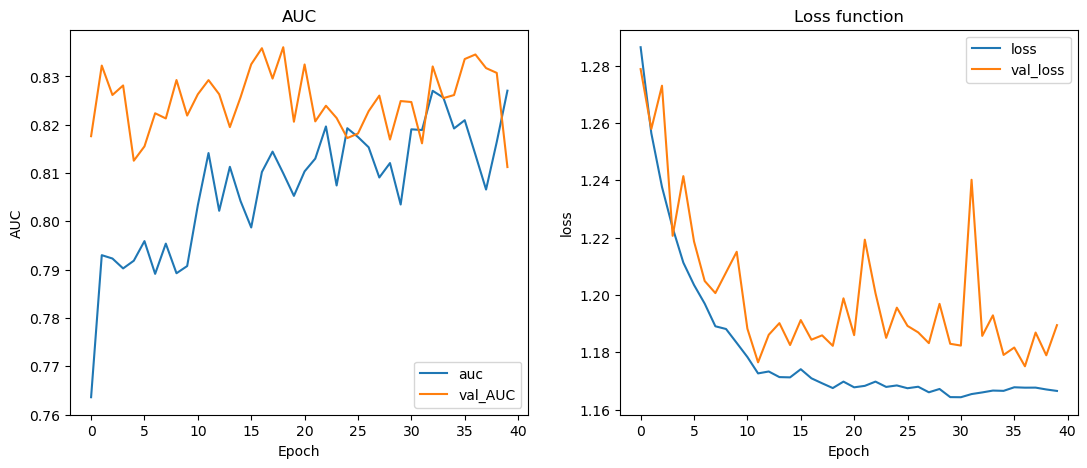

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('AUC')
ax[0].plot(history_train.index, np.array(history_train['AUC']),
         label='auc')
ax[0].plot(history_valid.index, np.array(history_valid['AUC']),
         label='val_AUC')
ax[0].legend()
ax[0].title.set_text("AUC")

ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('loss')
ax[1].plot(history_train.index, np.array(history_train['Loss']),
         label='loss')
ax[1].plot(history_valid.index, np.array(history_valid['Loss']),
         label='val_loss')
ax[1].legend()
ax[1].title.set_text("Loss function")
plt.show()

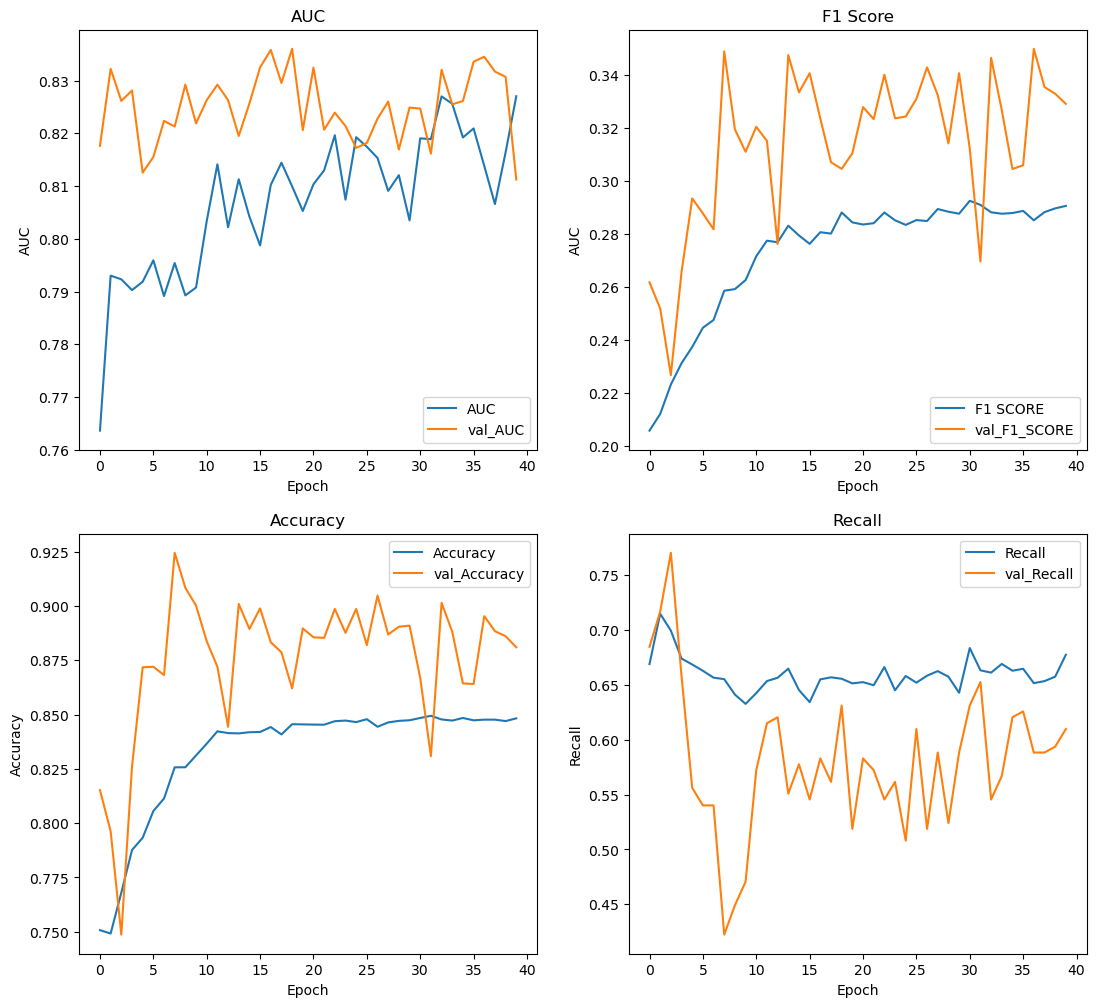

In [88]:
fig, ax = plt.subplots(2, 2, figsize=(13, 12))

ax[0][0].set_xlabel('Epoch')
ax[0][0].set_ylabel('AUC')
ax[0][0].plot(history_train.index, np.array(history_train['AUC']),
         label='AUC')
ax[0][0].plot(history_valid.index, np.array(history_valid['AUC']),
         label='val_AUC')
ax[0][0].legend()
ax[0][0].title.set_text("AUC")

ax[0][1].set_xlabel('Epoch')
ax[0][1].set_ylabel('AUC')
ax[0][1].plot(history_train.index, np.array(history_train['F1 Score']),
         label='F1 SCORE')
ax[0][1].plot(history_valid.index, np.array(history_valid['F1 Score']),
         label='val_F1_SCORE')
ax[0][1].legend()
ax[0][1].title.set_text("F1 Score")

ax[1][0].set_xlabel('Epoch')
ax[1][0].set_ylabel('Accuracy')
ax[1][0].plot(history_train.index, np.array(history_train['Accuracy']),
         label='Accuracy')
ax[1][0].plot(history_valid.index, np.array(history_valid['Accuracy']),
         label='val_Accuracy')
ax[1][0].legend()
ax[1][0].title.set_text("Accuracy")

ax[1][1].set_xlabel('Epoch')
ax[1][1].set_ylabel('Recall')
ax[1][1].plot(history_train.index, np.array(history_train['Recall']),
         label='Recall')
ax[1][1].plot(history_valid.index, np.array(history_valid['Recall']),
         label='val_Recall')
ax[1][1].legend()
ax[1][1].title.set_text("Recall")

plt.show()

**Wczytujemy najlepszy model i robimy na nim test**

In [89]:
model = torch.load('checkpoint/model-1.1822397708892822-0.8360416889190674.pth')
score = test(test_dataloader, model, criterion, 100, history_valid)

Test Error: 
 Accuracy: 0.8447362184524536, Recall: 0.6621004343032837 F1Score: 0.3008298873901367 AUC: 0.8571126461029053 Avg loss: 1.199753 



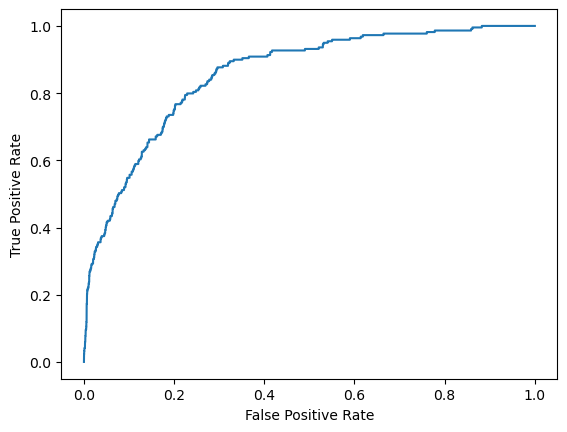

In [90]:
def test_roc(dataloader, model):
    model.eval()
    roc = ROC(task="binary")
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            fpr, tpr, thresholds = roc(pred, y.unsqueeze(1).to(torch.int))
            plt.plot(fpr, tpr)
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            plt.show()
test_roc(test_dataloader, model)

# Podsumowanie

In [91]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, recall_score

def count_score(model, name):
    prediction = model.predict(X_test)
    acc = accuracy_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    return [name, acc, auc, f1, recall]

def count_PyTorch(model):
    model.eval()
    prediction
    
compare_models = ps.DataFrame(columns=['Model', 'Accuracy', 'AUC', 'F1 Score', 'Recall'])
compare_models.loc[len(compare_models.index)] = count_score(lr, 'Logistic Regression')
compare_models.loc[len(compare_models.index)] = count_score(svc_rbf, 'SVC')
compare_models.loc[len(compare_models.index)] = count_score(dt, 'Decision Tree')
compare_models.loc[len(compare_models.index)] = count_score(rf, 'Random Forest')
compare_models.loc[len(compare_models.index)] = count_score(xgb, 'XGBoost')
compare_models.loc[len(compare_models.index)] = count_score(cat, 'CatBoost')
compare_models.loc[len(compare_models.index)] = score

compare_models

,Model,Accuracy,AUC,F1 Score,Recall
0,Logistic Regression,0.824004,0.786265,0.299083,0.744292
1,SVC,0.917761,0.671338,0.327684,0.397260
2,Decision Tree,0.775628,0.782410,0.262121,0.789954
3,Random Forest,0.901175,0.790150,0.404993,0.666667
4,XGBoost,0.963833,0.762614,0.600509,0.538813
5,CatBoost,0.964064,0.801647,0.635514,0.621005
6,PyTorch,0.844736,0.857113,0.300830,0.662100


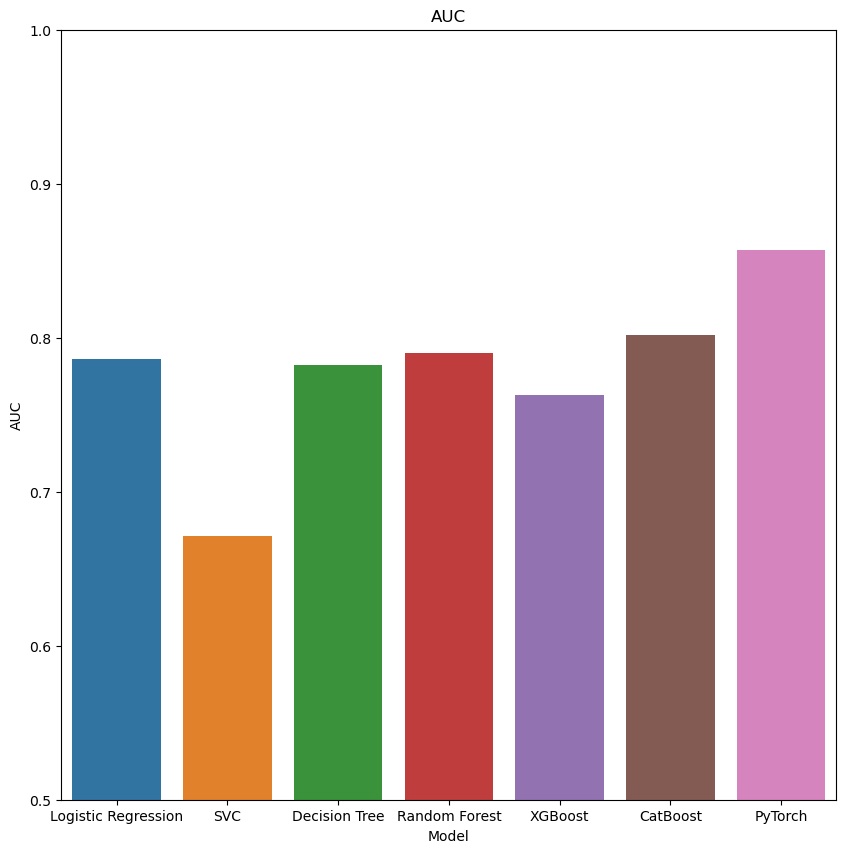

In [93]:
plt.figure(figsize=(10, 10))
plt.title("AUC")
sns.barplot(data=compare_models, x='Model', y='AUC')
plt.ylim([0.5, 1])
plt.show()

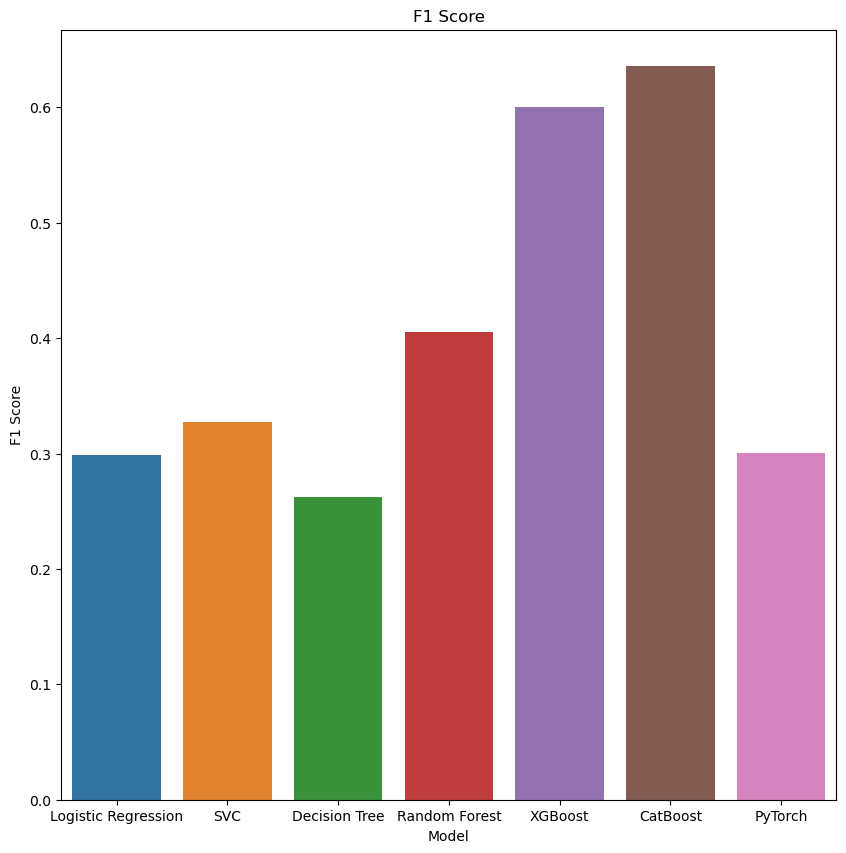

In [94]:
plt.figure(figsize=(10, 10))
plt.title("F1 Score")
sns.barplot(data=compare_models, x='Model', y='F1 Score')
plt.show()

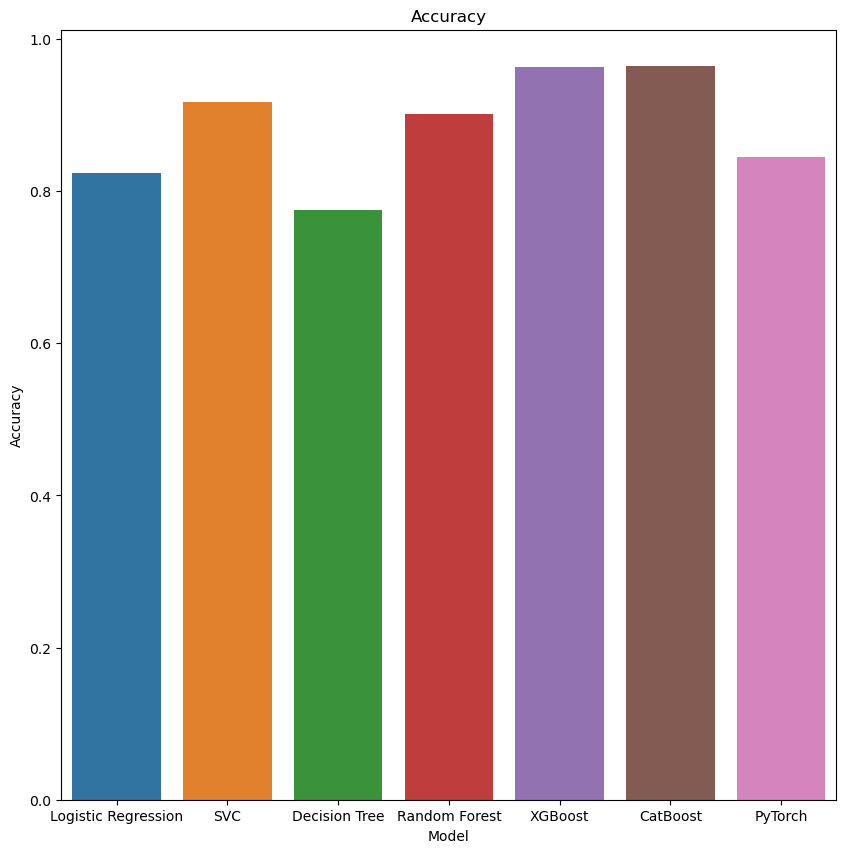

In [95]:
plt.figure(figsize=(10, 10))
plt.title("Accuracy")
sns.barplot(data=compare_models, x='Model', y='Accuracy')
plt.show()

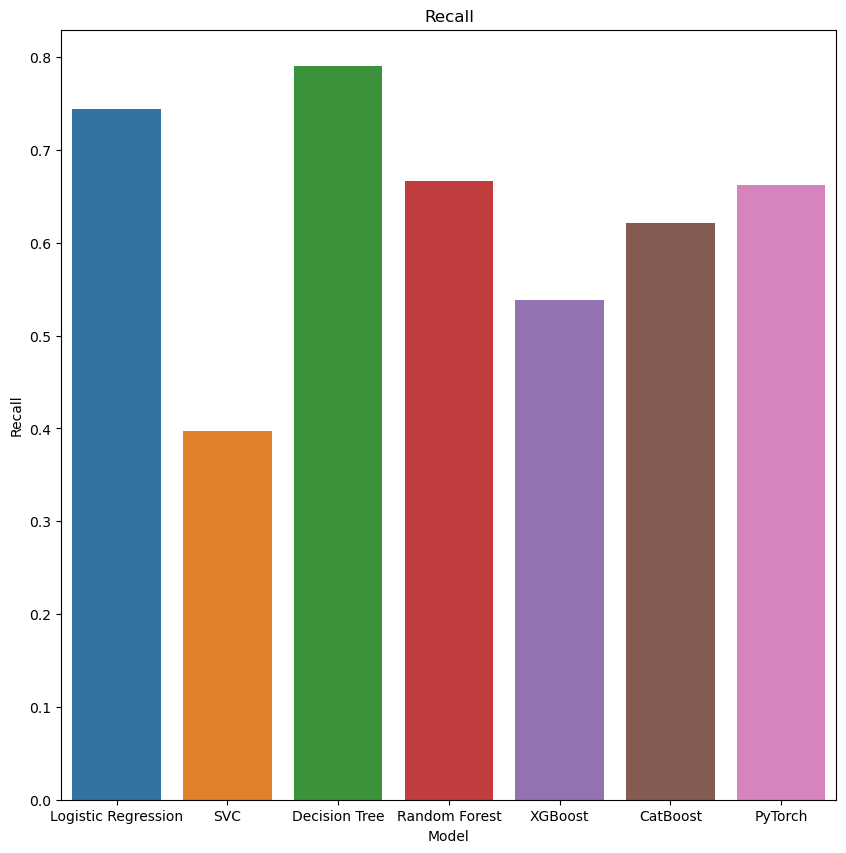

In [96]:
plt.figure(figsize=(10, 10))
plt.title("Recall")
sns.barplot(data=compare_models, x='Model', y='Recall')
plt.show()

Największy **AUC** posiada sieć neuronowa (**PyTorch**) na poziomie *0.857113* i według naszej głównej miary jest to najlepszy model.

Na uwage zasługują również Boosting Tree modele (**CatBoost** i **XGBoost**), które posiadają wysoką dokładność około *96%*
i przy tym zachowały wysoko F1 Score ok. *0.6*

## Zapisanie modeli

In [97]:
import joblib
joblib.dump(lr, 'model/{}.sav'.format("lr"))
joblib.dump(svc_rbf, 'model/{}.sav'.format("svc"))
joblib.dump(dt, 'model/{}.sav'.format("dt"))
joblib.dump(rf, 'model/{}.sav'.format("rf"))
joblib.dump(xgb, 'model/{}.sav'.format("xgb"))
joblib.dump(cat, 'model/{}.sav'.format("cat"))
torch.save(model, 'model/{}.sav'.format("pytorch"))